In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from PIL import Image
import rampy
from BaselineRemoval import BaselineRemoval
%matplotlib inline
%config InlineBackend.figure_fornat = 'retina'
pd.set_option('display.max_rows',5000)
pd.set_option('display.max_columns',5000)

In [2]:
import glob
path =r'C:/Users/HP/Desktop/Data/DataAnalysis_raman/NewDatasetTHz/Nor_all/'
filenames = glob.glob(path + "/*.csv")

Nor_all = []
for file in filenames:
    Nor_all.append(pd.read_csv(file,sep = ',', encoding='utf-8', names=['Data'], skiprows=1))
frame = pd.concat(Nor_all, axis=1, ignore_index=True)

In [3]:
frame_NoNaN = frame.dropna()

In [6]:
frame_NoNaN[0]

0       0.791840
1       0.896585
2       1.177884
3       0.803333
4       1.331730
5       1.442576
6       2.571392
7       0.580787
8       0.529960
9       0.828974
10      1.108175
11      1.492628
12      0.913921
13      0.755053
14      0.896708
15      1.025091
16      1.087709
17      1.000508
18      0.894406
19      0.886042
20      0.946375
21      1.001079
22      0.997242
23      0.965487
24      0.944506
25      0.956289
26      0.969775
27      0.966109
28      0.947036
29      0.929769
30      0.936245
31      0.969166
32      0.998545
33      0.995197
34      0.965227
35      0.934956
36      0.921546
37      0.932617
38      0.959227
39      0.990871
40      0.995393
41      0.984218
42      0.961035
43      0.936359
44      0.924919
45      0.930380
46      0.949361
47      0.972671
48      0.985578
49      0.977028
50      0.954884
51      0.930645
52      0.919333
53      0.926729
54      0.943638
55      0.966448
56      0.978998
57      0.972699
58      0.9487

In [42]:
frame_NoNaN[314]

0       1.000757
1       0.710206
2       1.206022
3       0.790121
4       1.375843
5       1.397983
6       2.026409
7       0.539347
8       0.742731
9       0.865393
10      1.259756
11      1.473032
12      0.925210
13      0.752959
14      0.912025
15      1.034360
16      1.074501
17      0.965889
18      0.887066
19      0.916347
20      0.988698
21      0.991405
22      0.960071
23      0.935750
24      0.952603
25      0.968352
26      0.962720
27      0.930413
28      0.917786
29      0.932948
30      0.952661
31      0.964612
32      0.955655
33      0.929126
34      0.914152
35      0.913347
36      0.923400
37      0.943113
38      0.950085
39      0.946428
40      0.928722
41      0.914985
42      0.907379
43      0.904996
44      0.915465
45      0.926632
46      0.932903
47      0.922002
48      0.904209
49      0.886239
50      0.878706
51      0.882930
52      0.893208
53      0.902383
54      0.901447
55      0.888611
56      0.867684
57      0.850293
58      0.8426

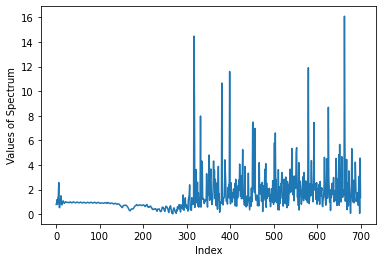

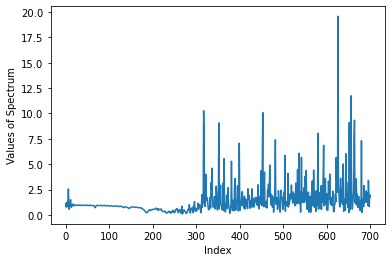

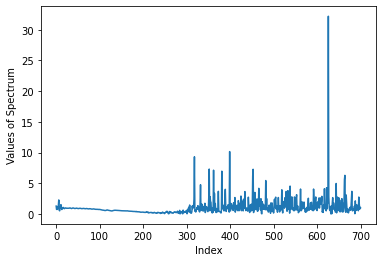

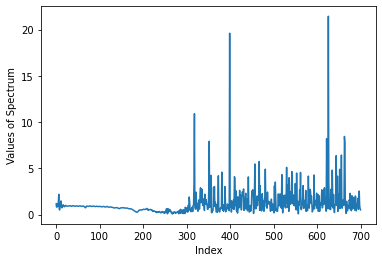

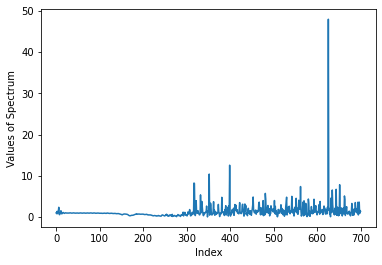

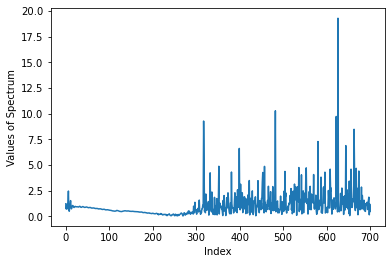

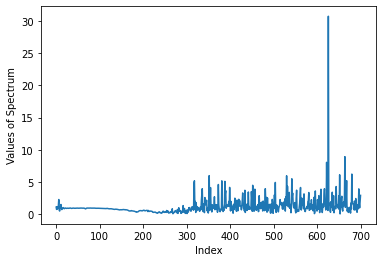

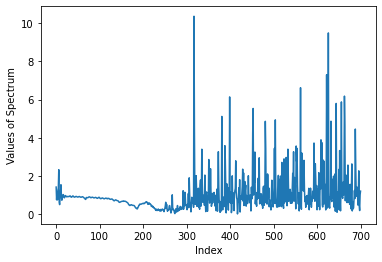

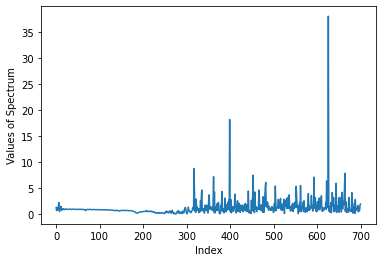

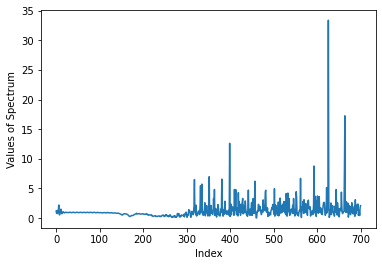

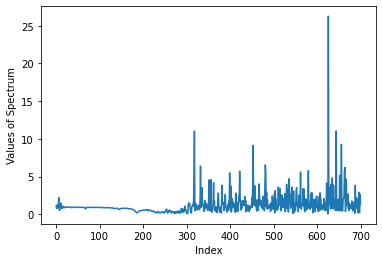

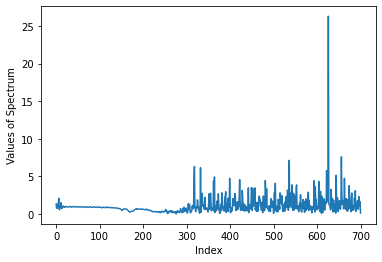

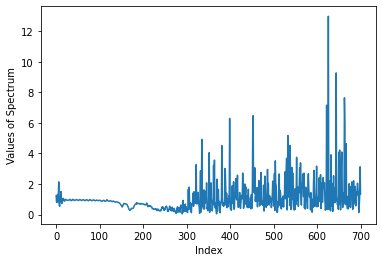

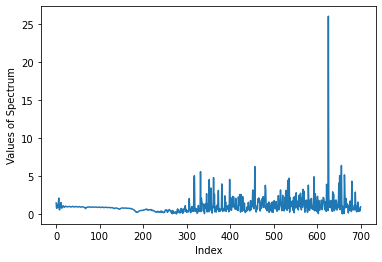

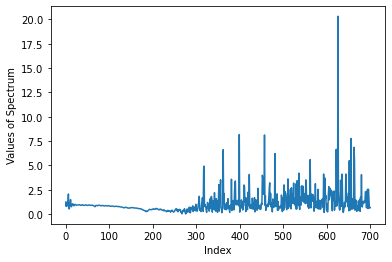

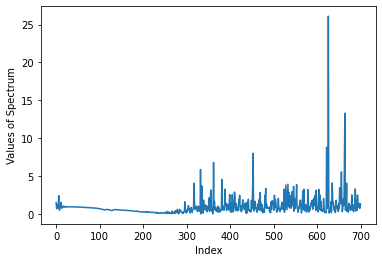

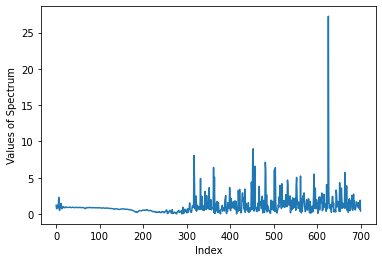

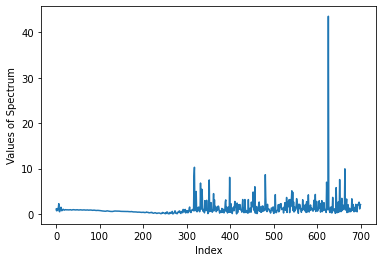

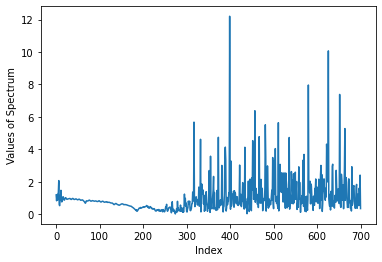

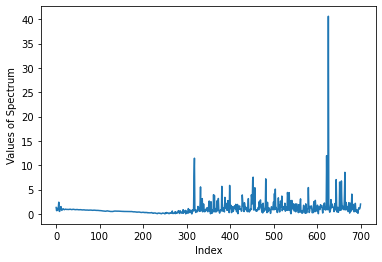

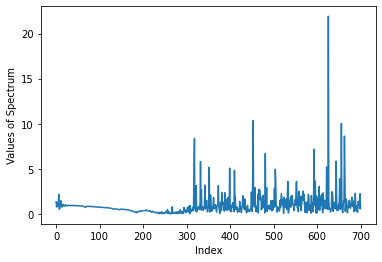

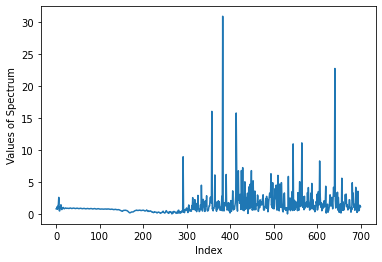

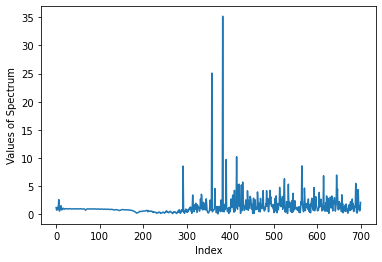

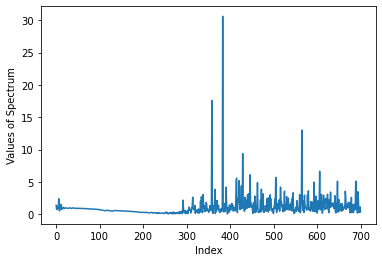

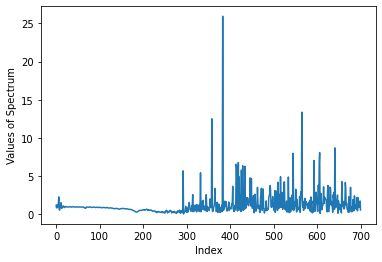

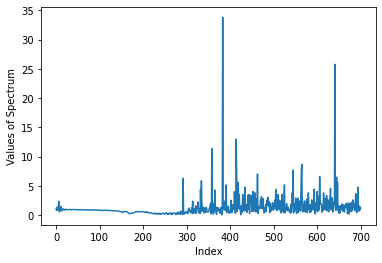

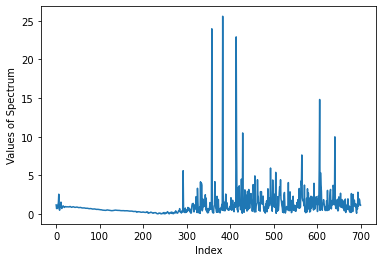

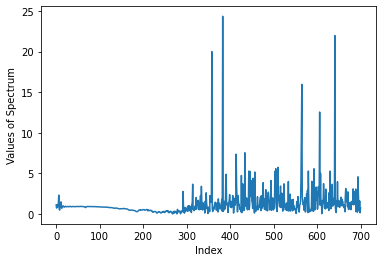

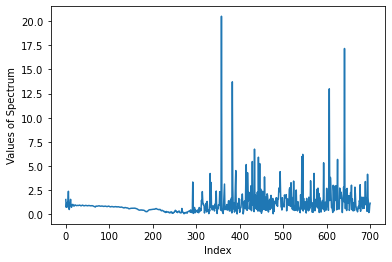

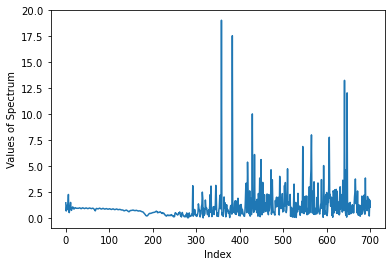

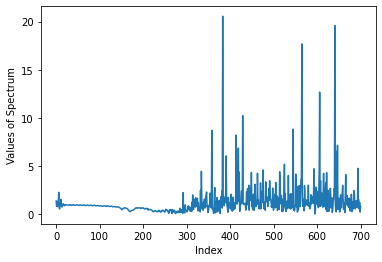

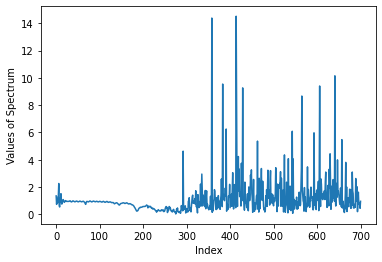

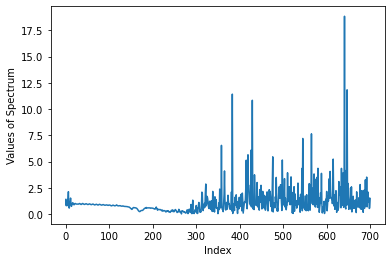

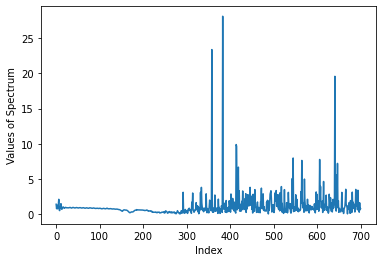

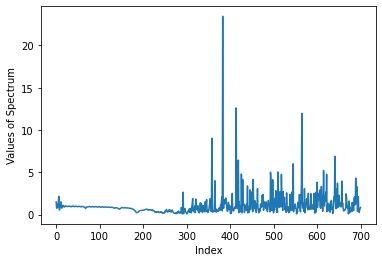

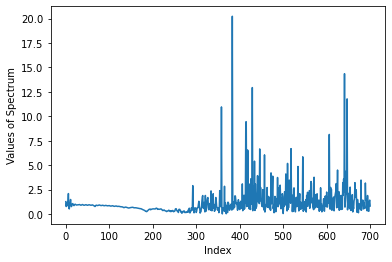

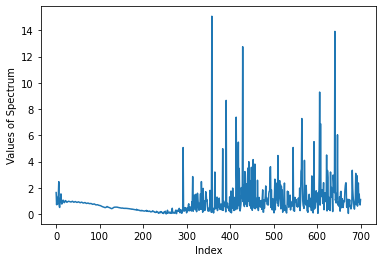

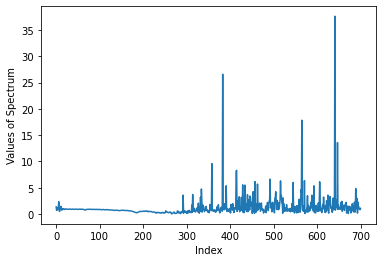

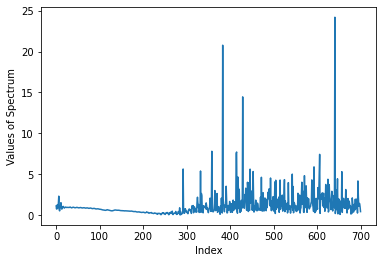

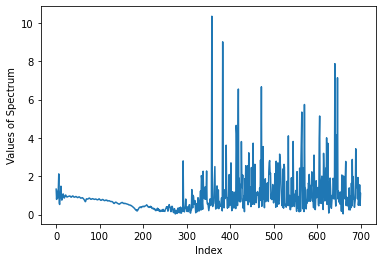

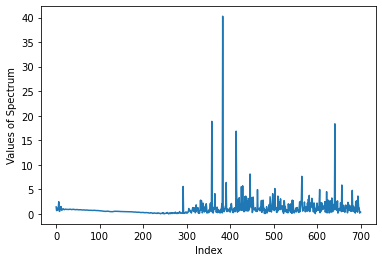

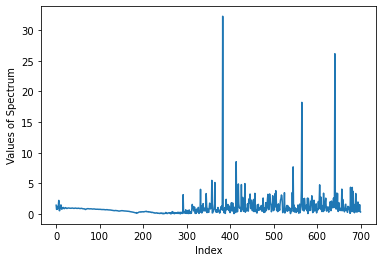

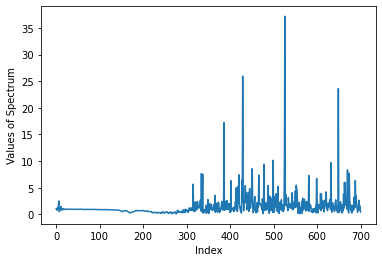

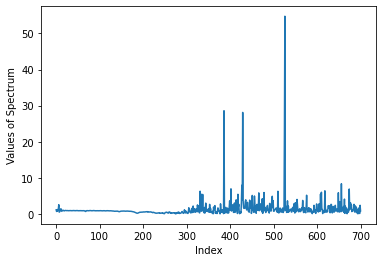

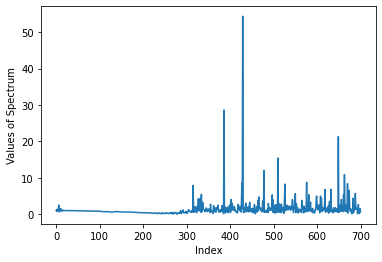

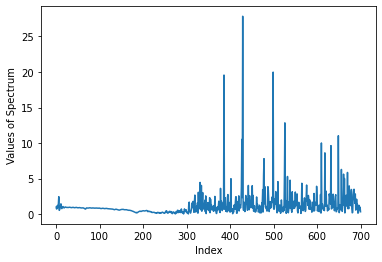

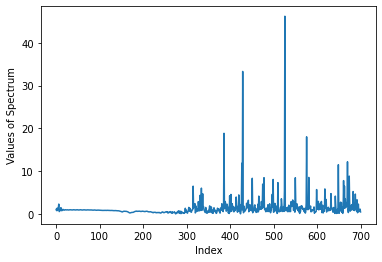

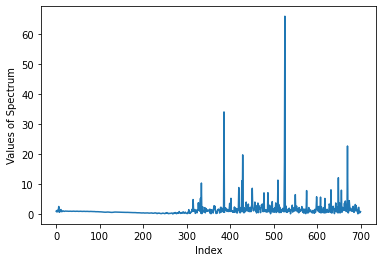

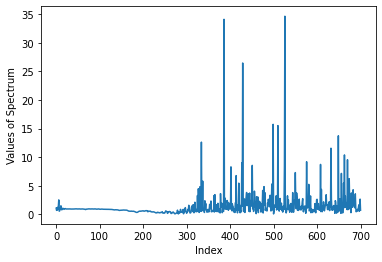

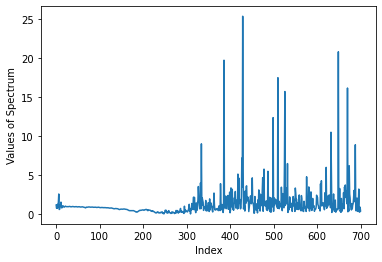

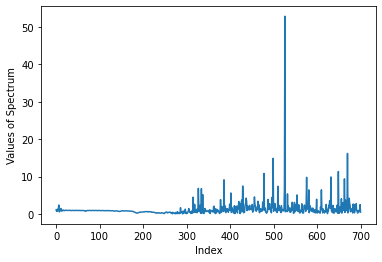

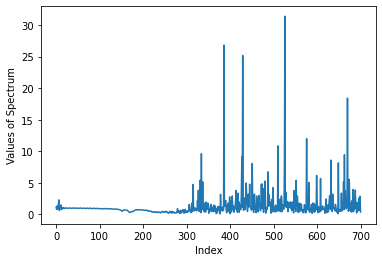

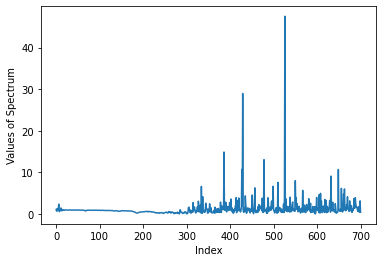

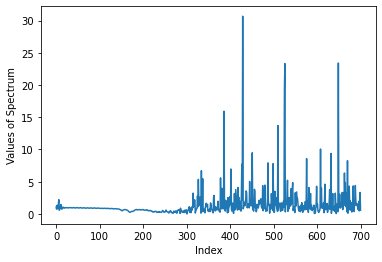

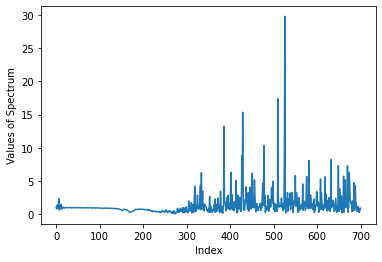

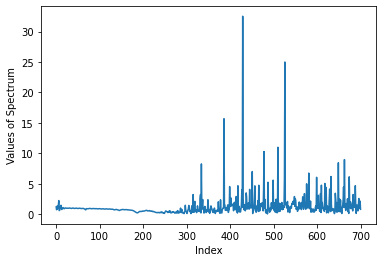

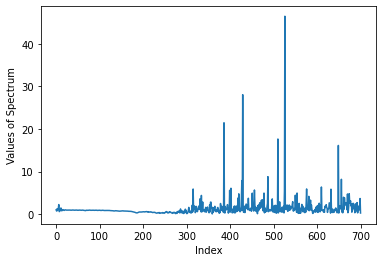

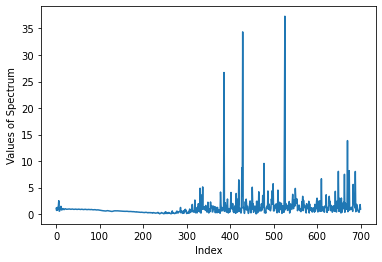

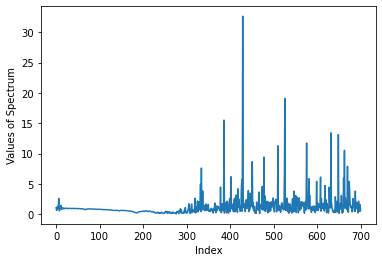

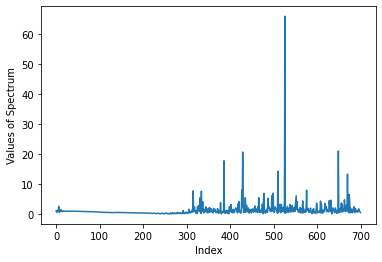

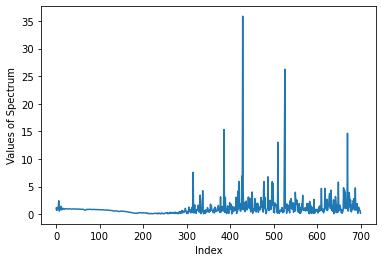

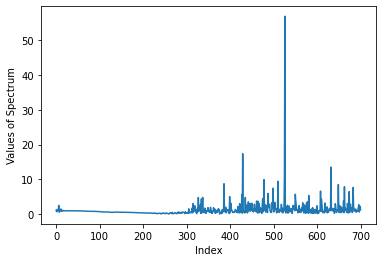

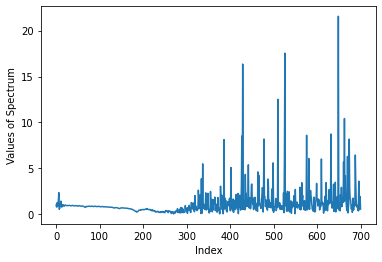

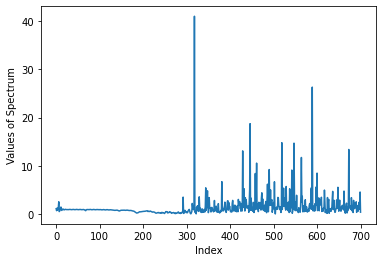

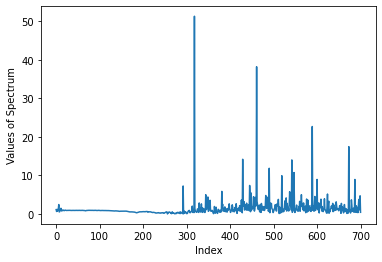

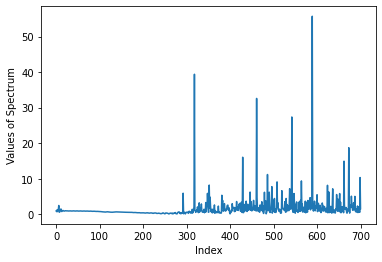

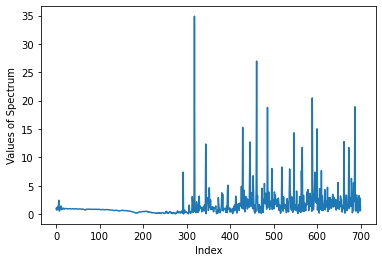

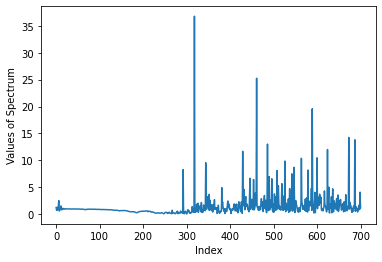

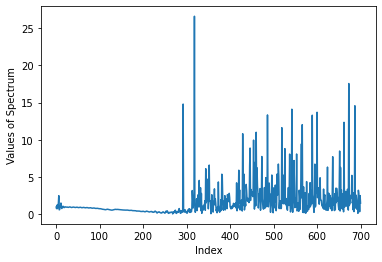

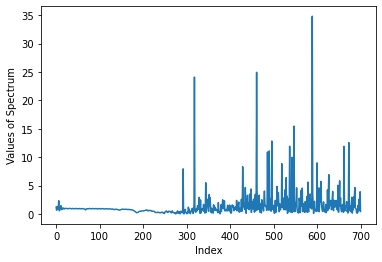

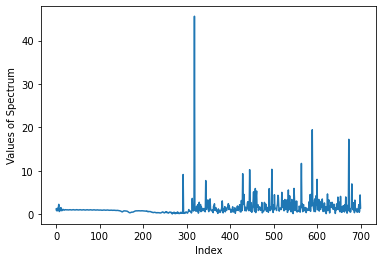

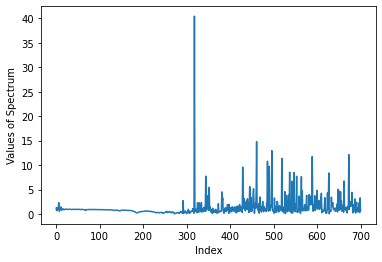

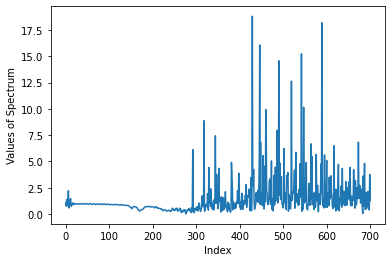

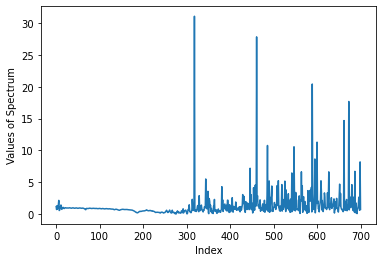

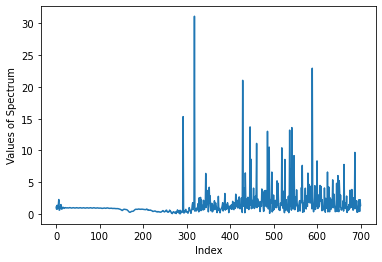

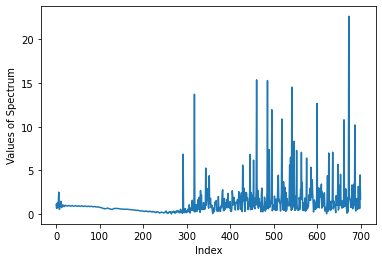

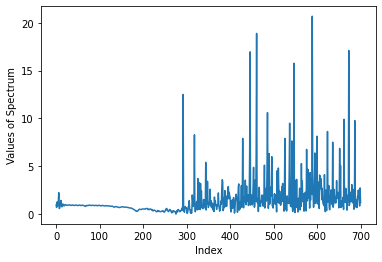

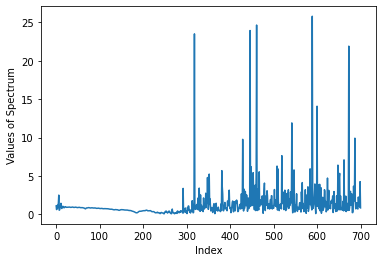

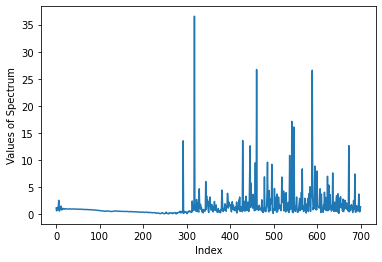

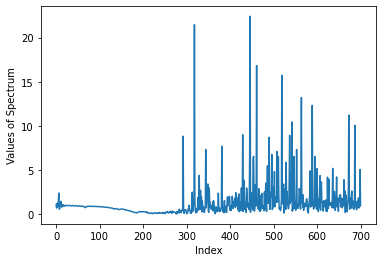

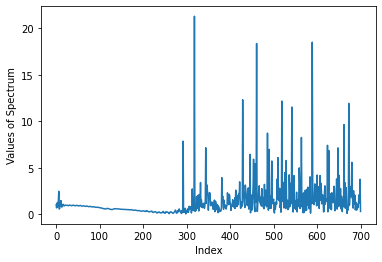

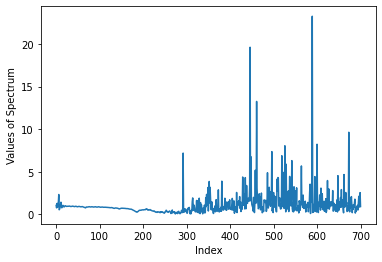

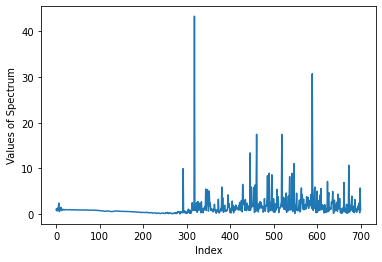

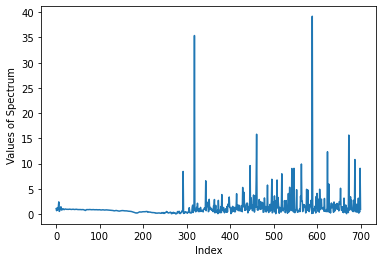

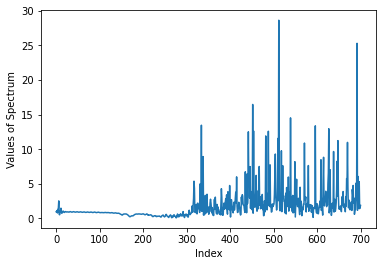

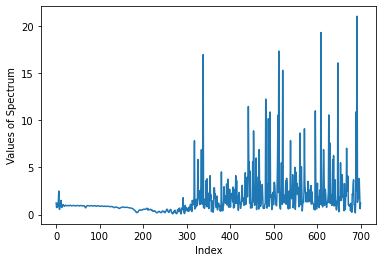

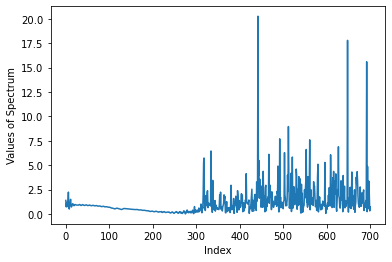

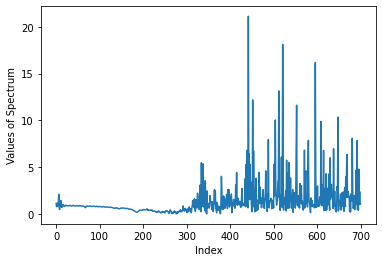

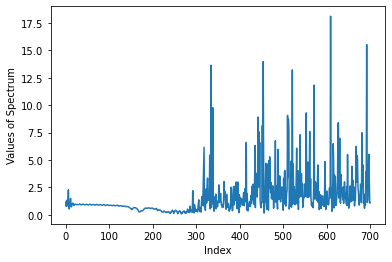

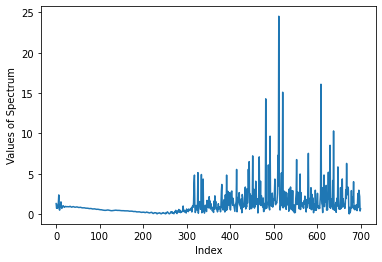

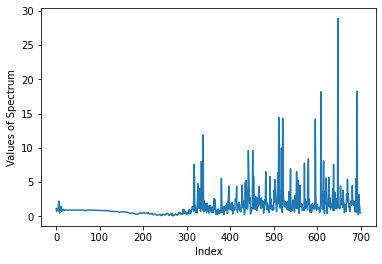

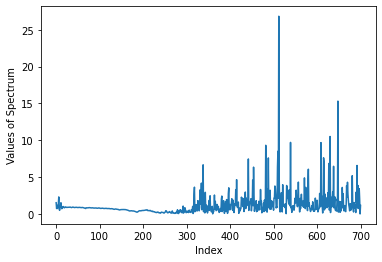

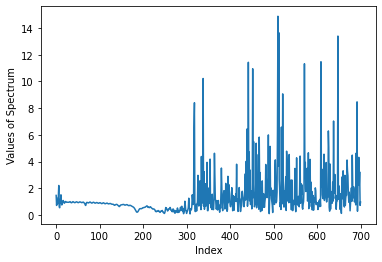

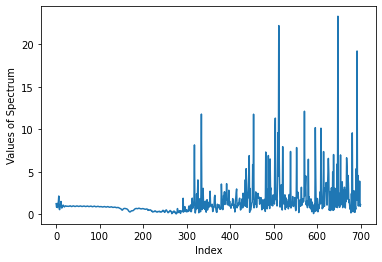

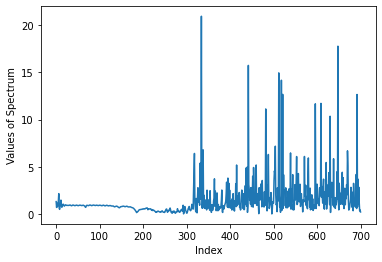

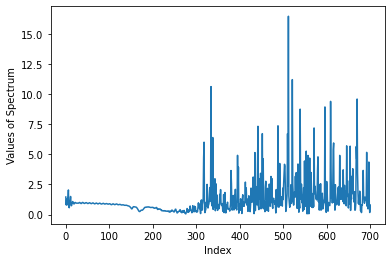

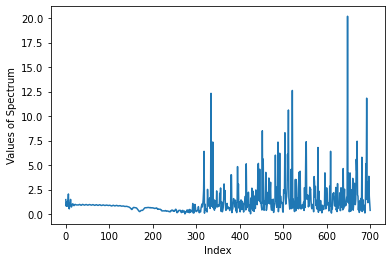

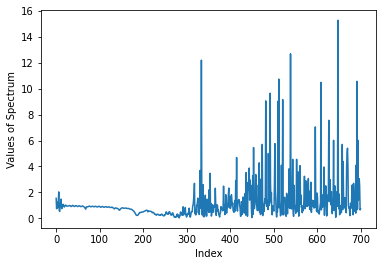

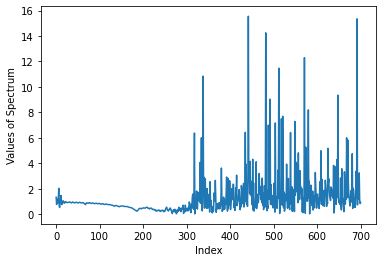

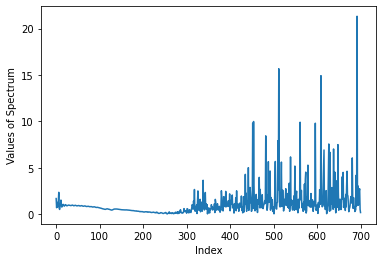

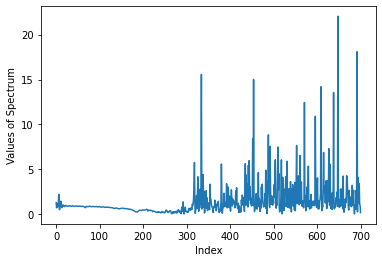

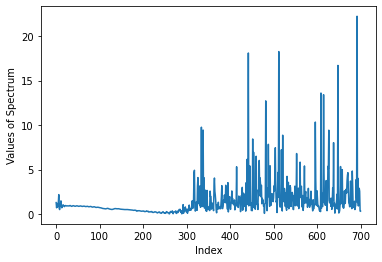

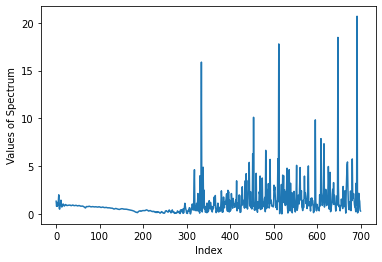

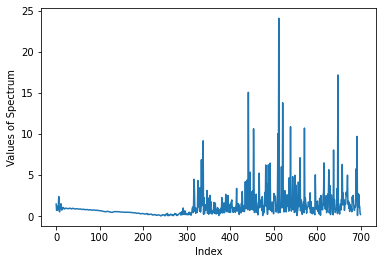

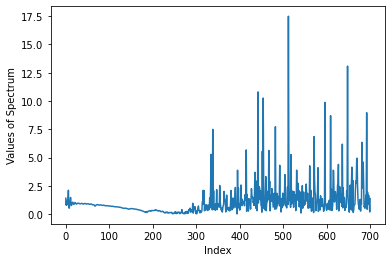

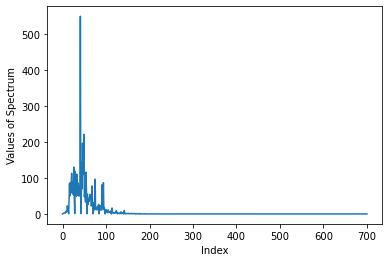

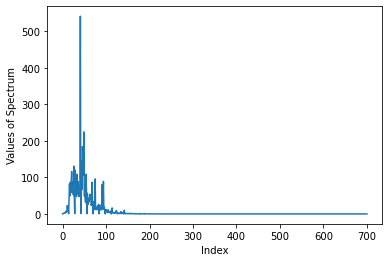

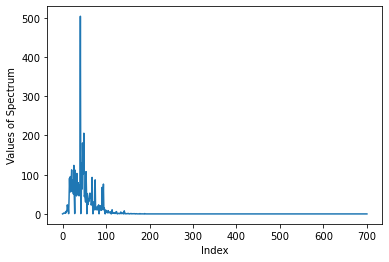

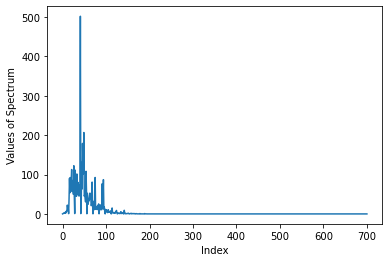

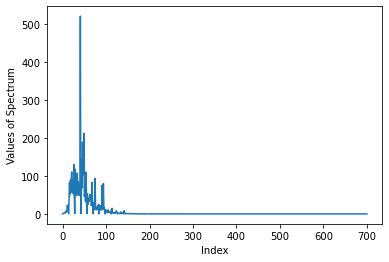

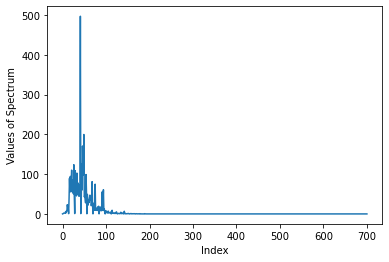

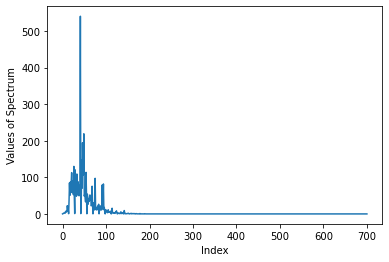

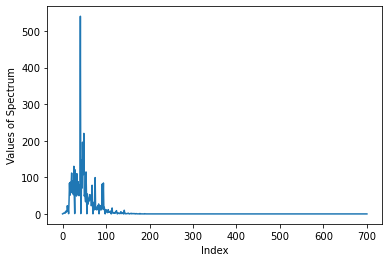

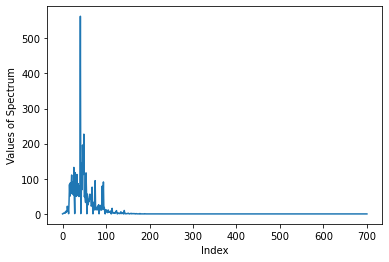

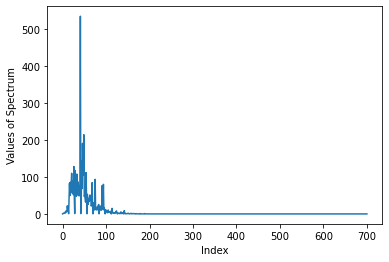

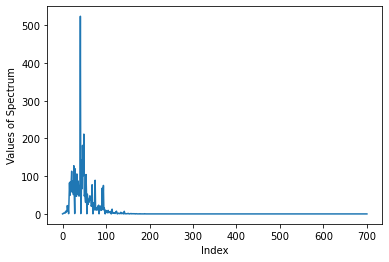

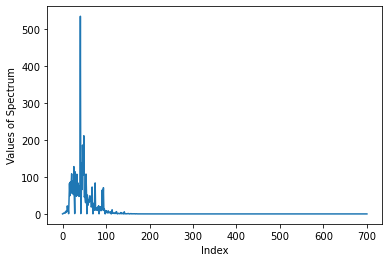

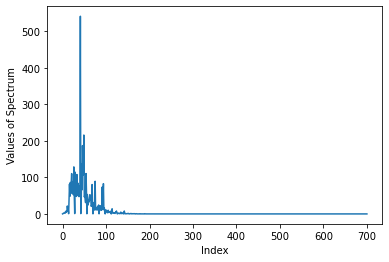

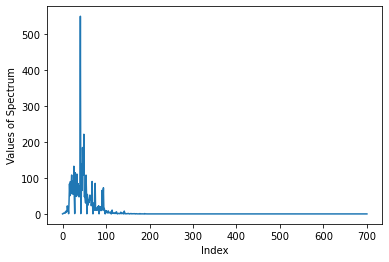

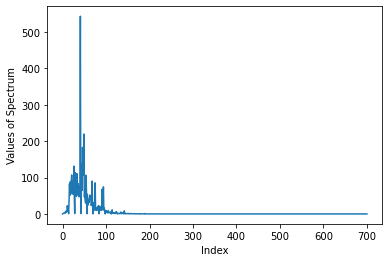

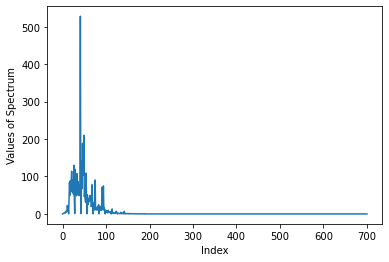

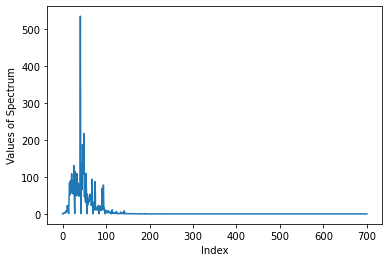

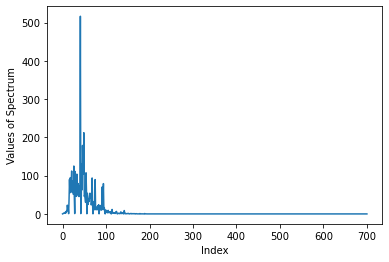

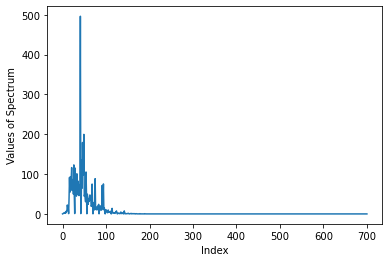

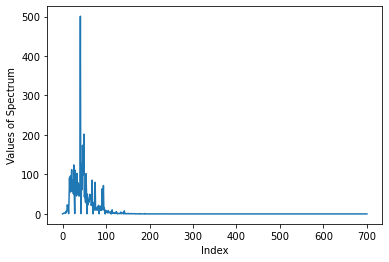

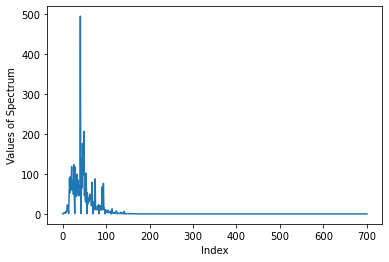

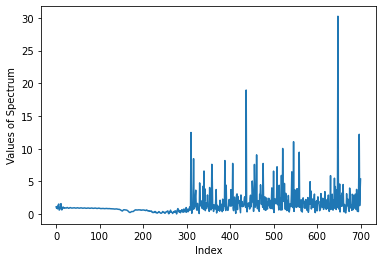

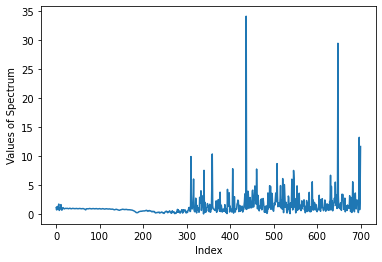

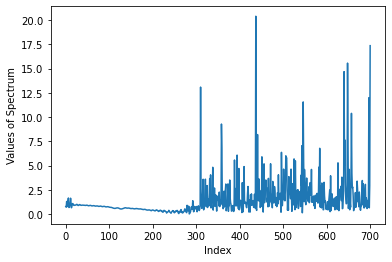

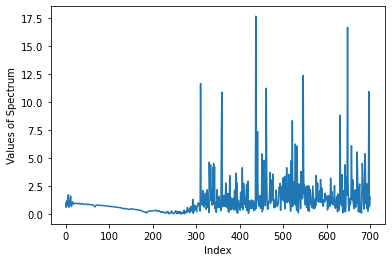

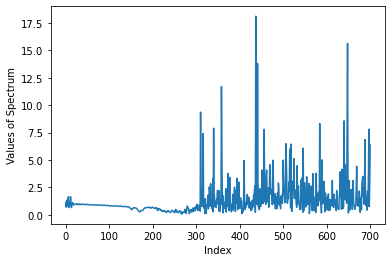

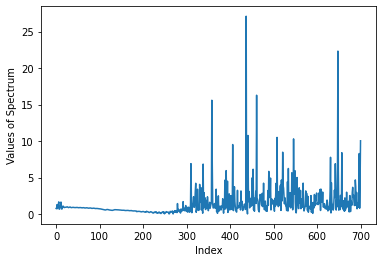

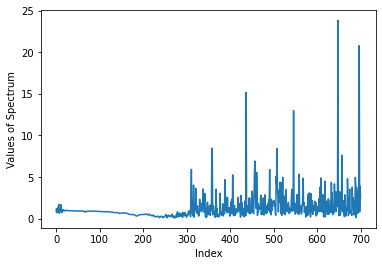

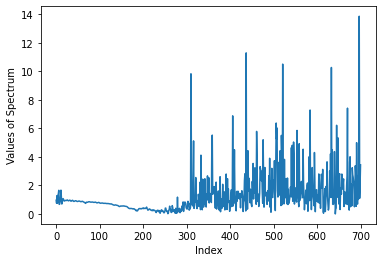

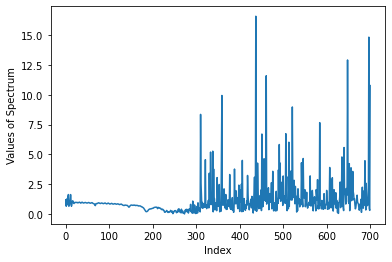

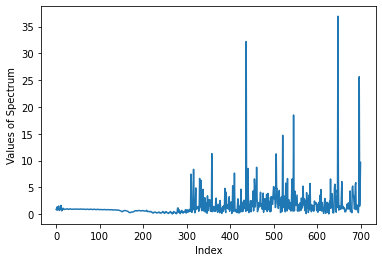

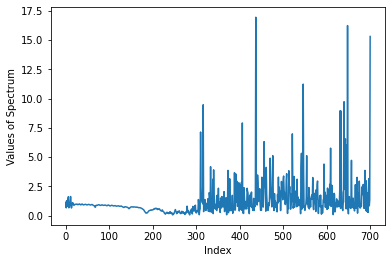

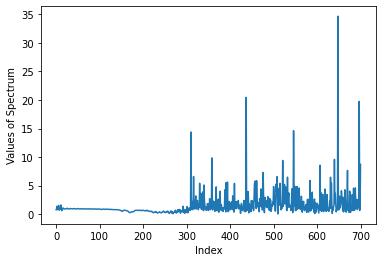

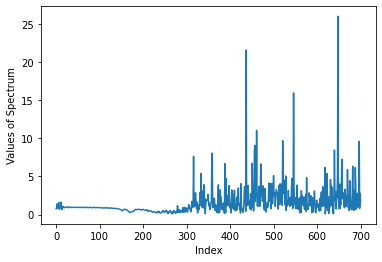

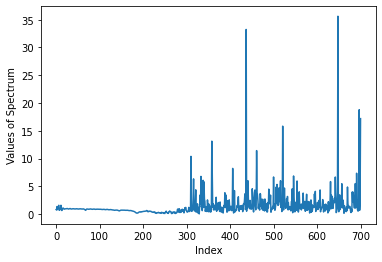

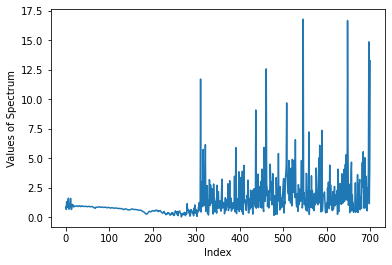

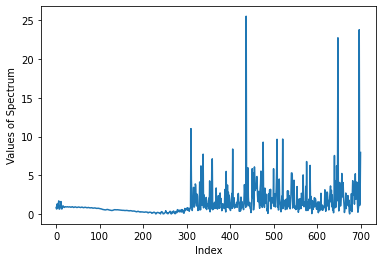

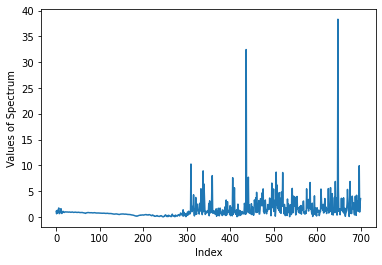

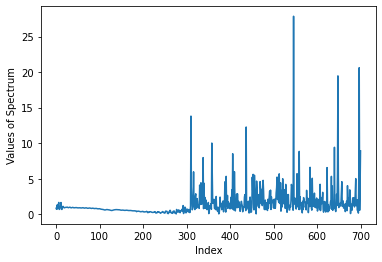

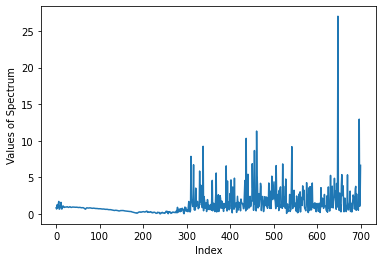

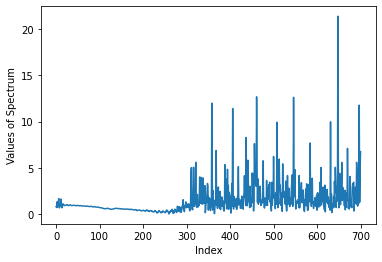

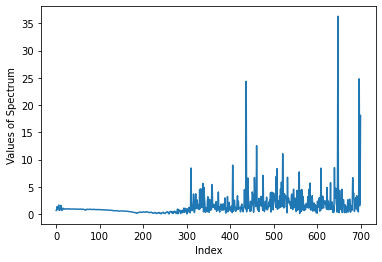

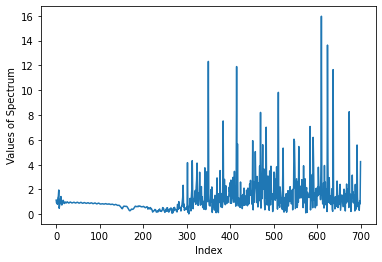

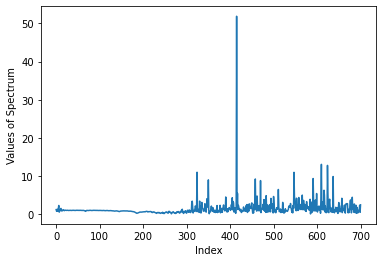

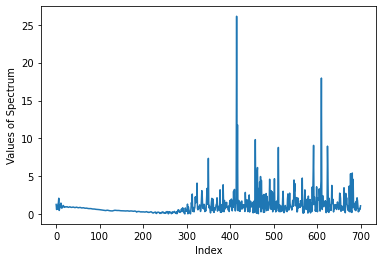

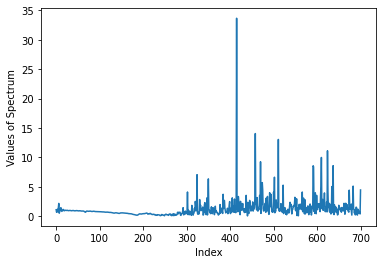

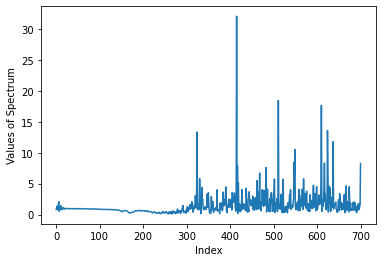

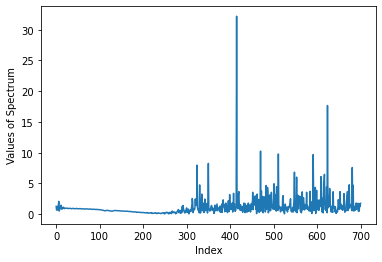

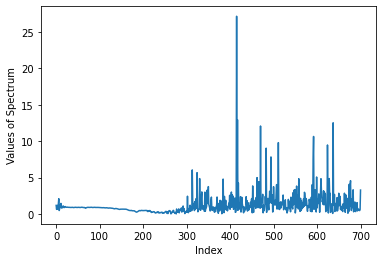

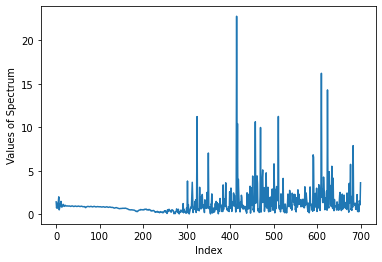

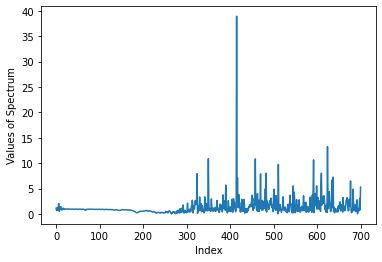

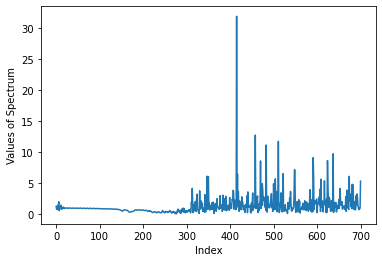

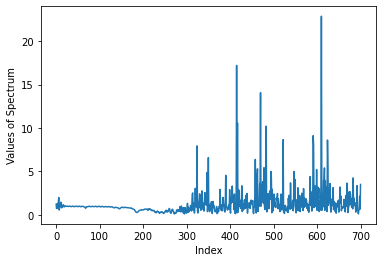

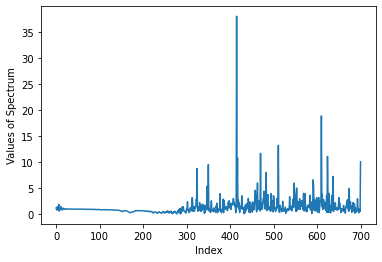

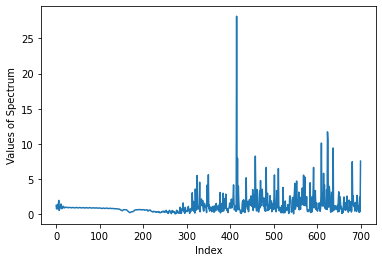

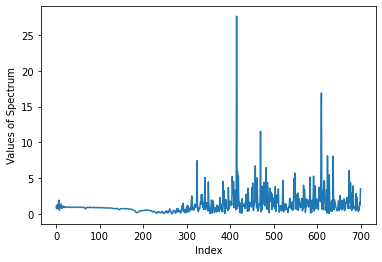

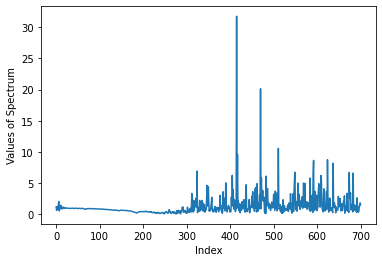

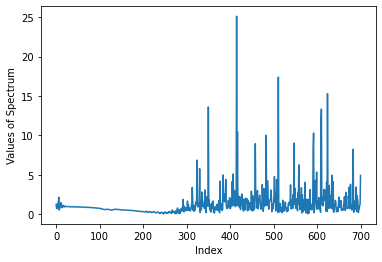

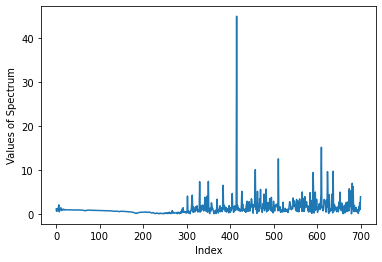

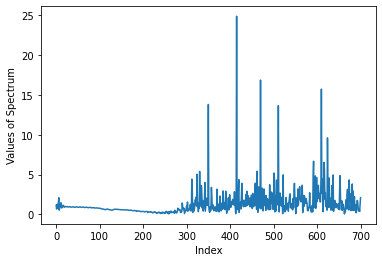

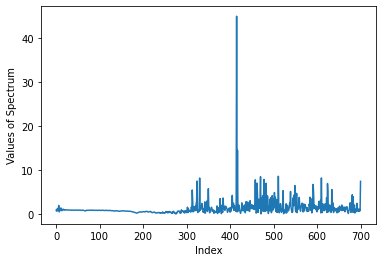

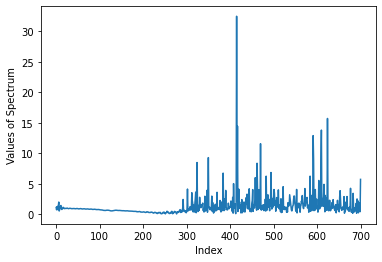

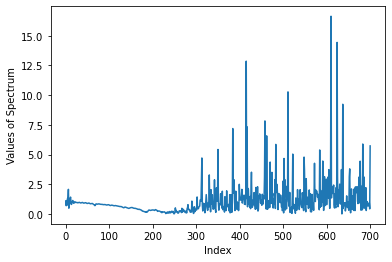

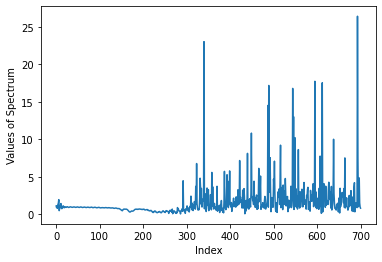

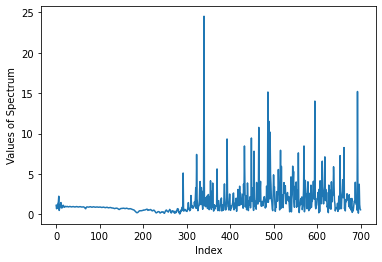

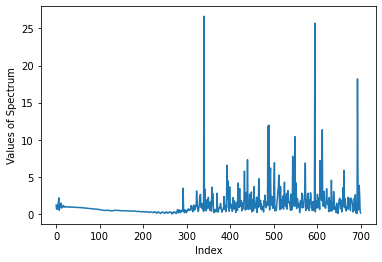

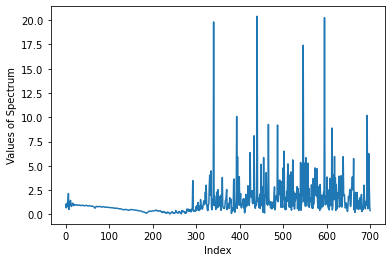

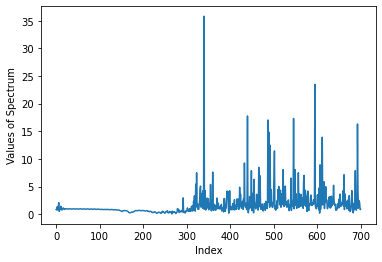

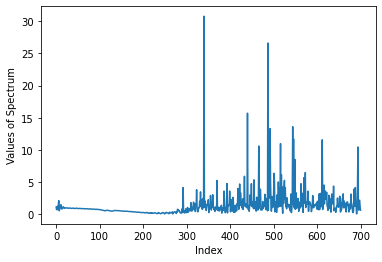

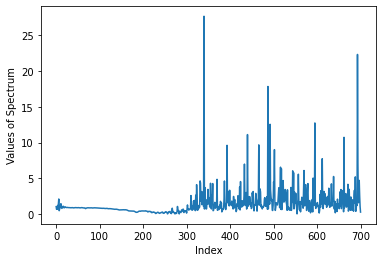

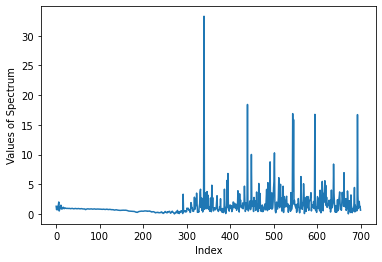

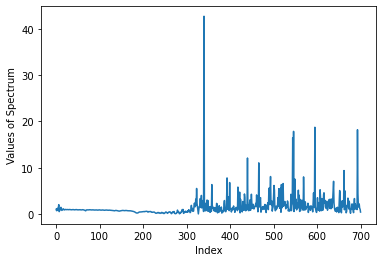

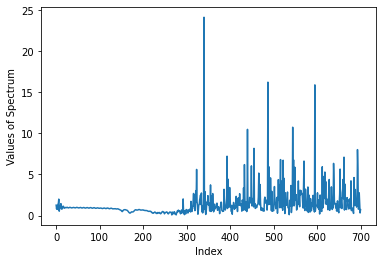

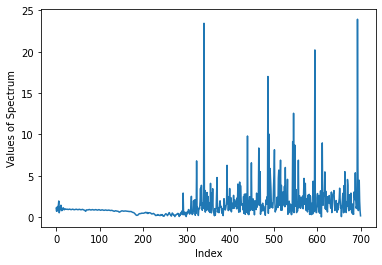

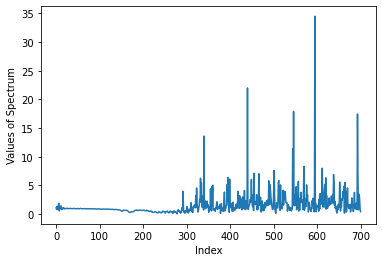

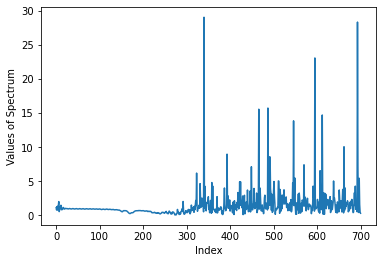

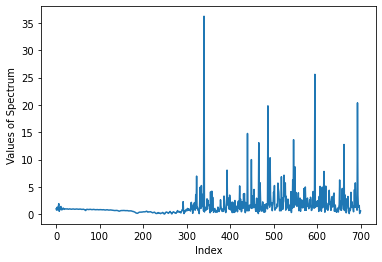

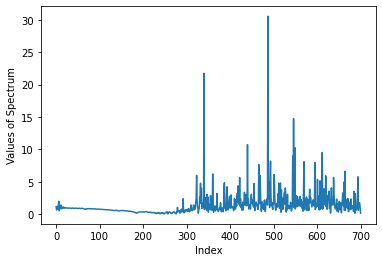

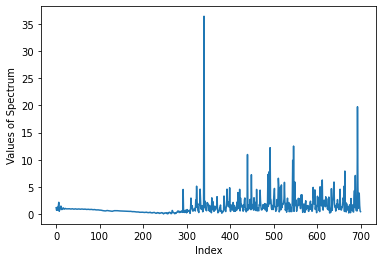

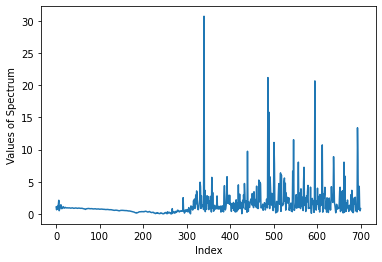

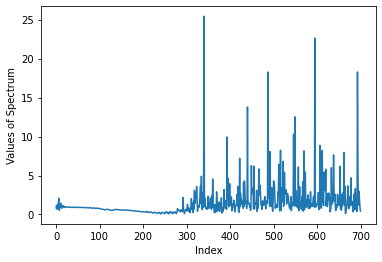

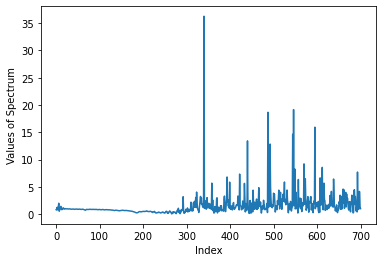

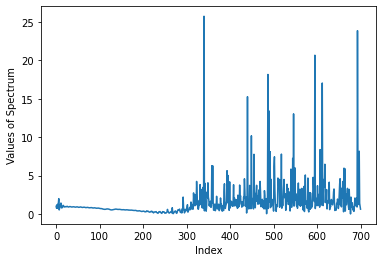

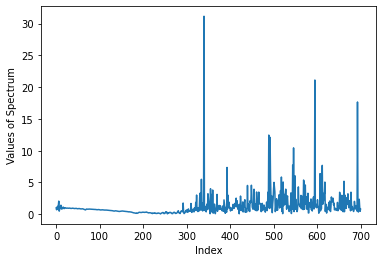

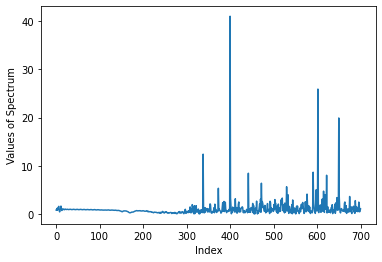

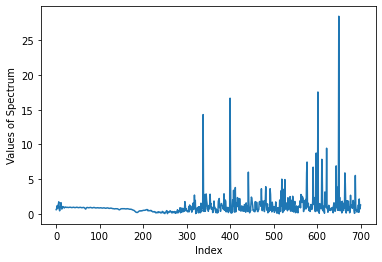

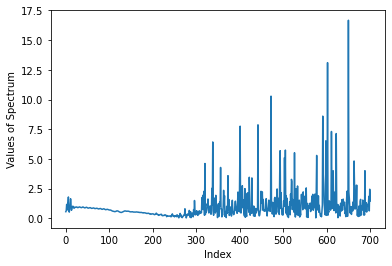

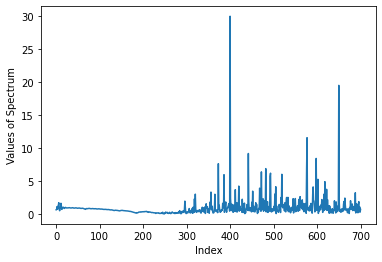

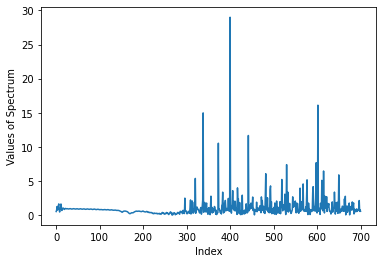

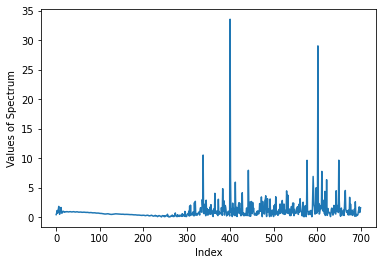

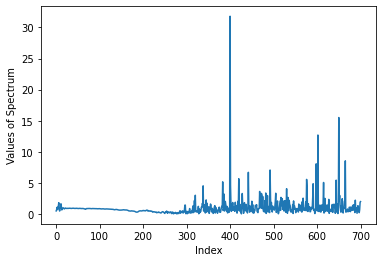

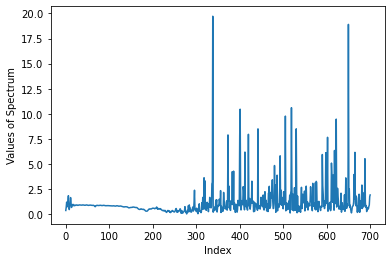

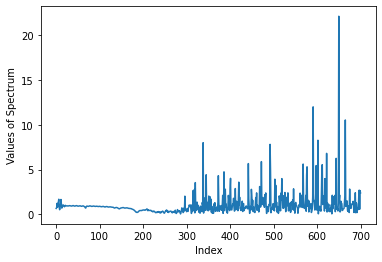

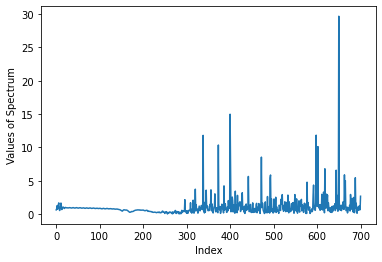

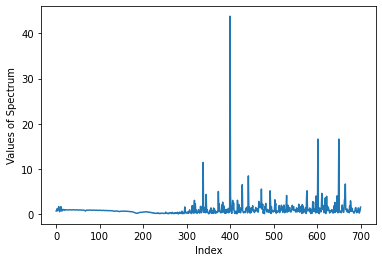

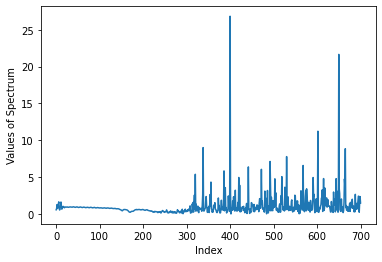

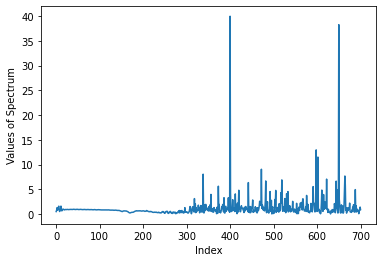

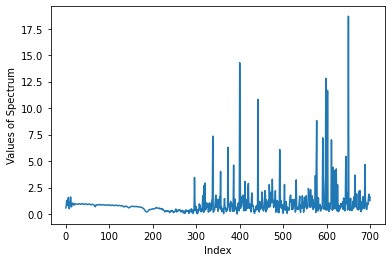

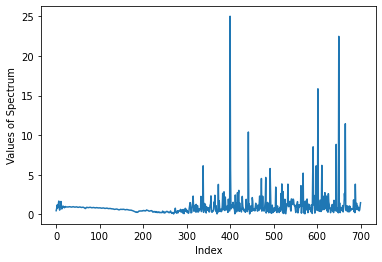

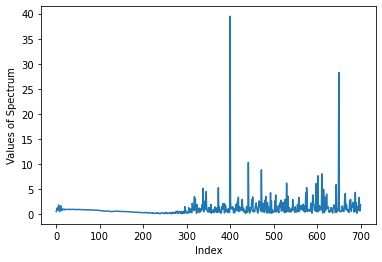

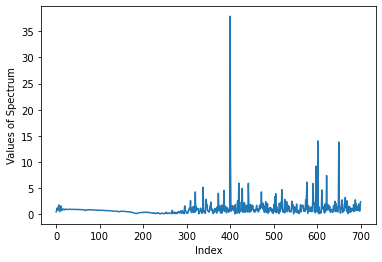

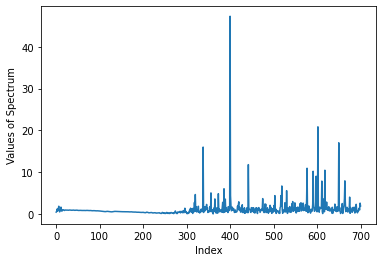

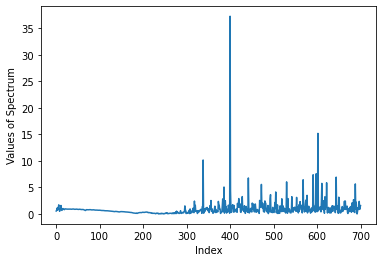

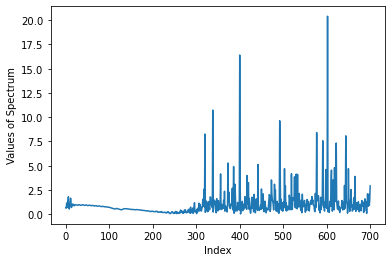

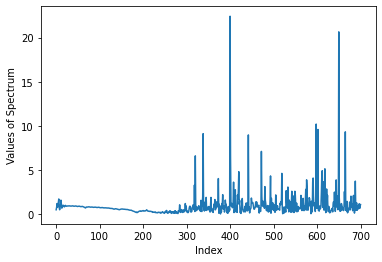

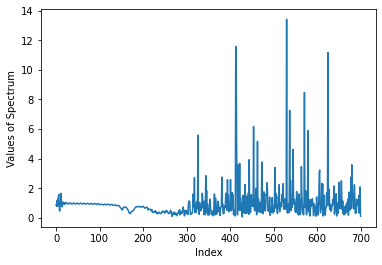

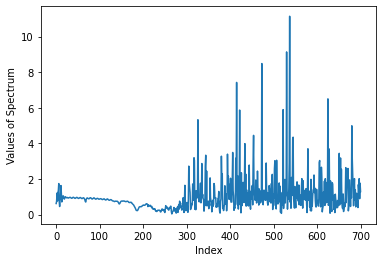

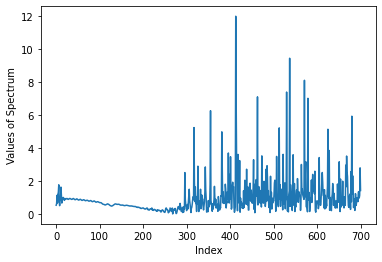

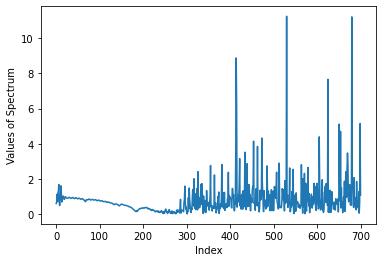

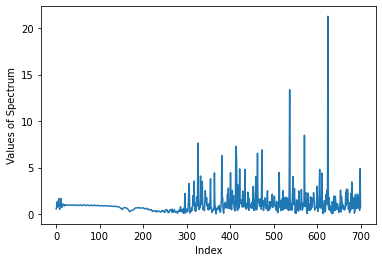

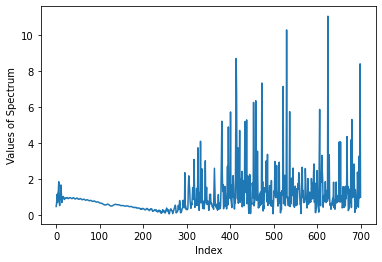

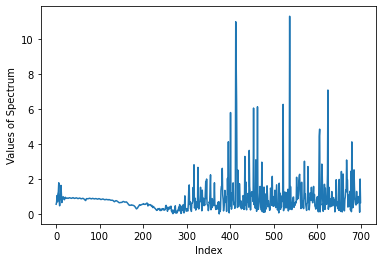

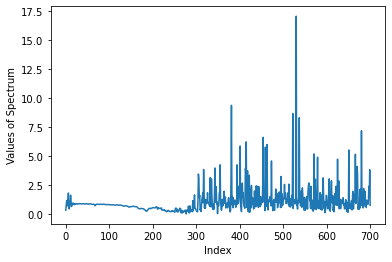

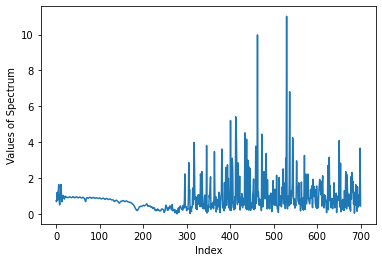

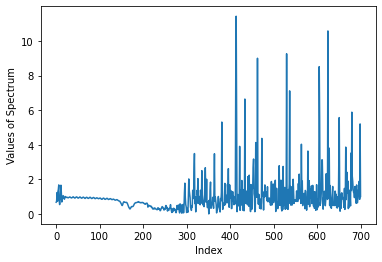

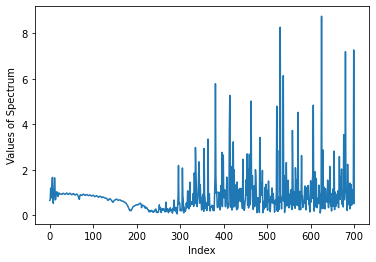

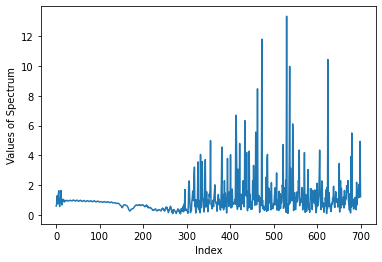

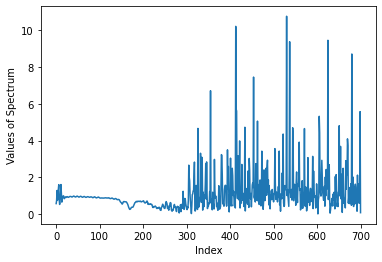

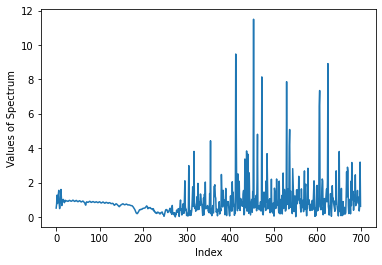

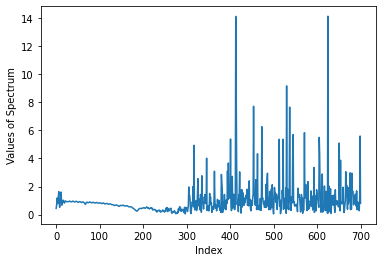

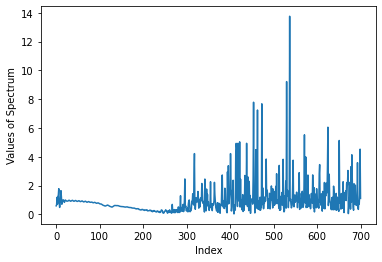

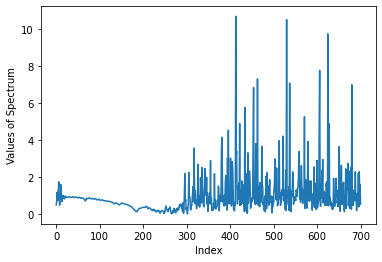

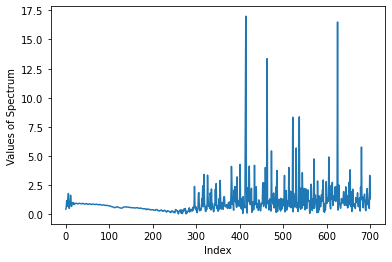

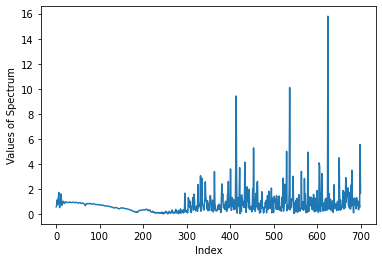

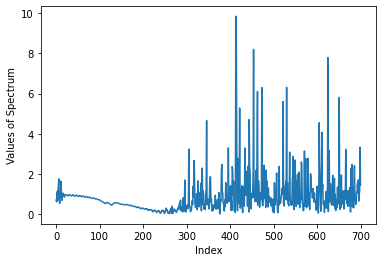

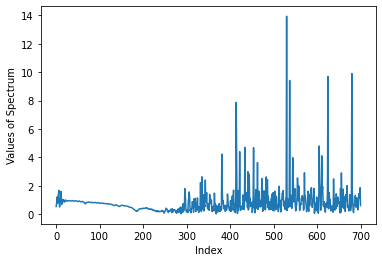

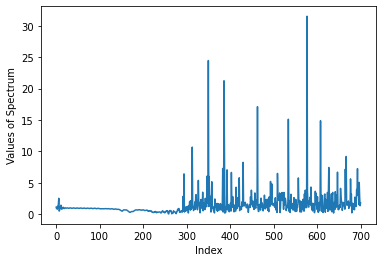

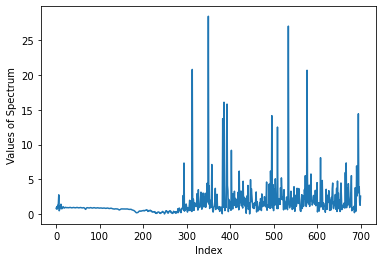

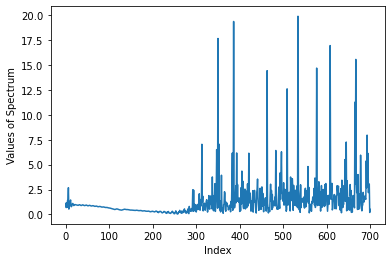

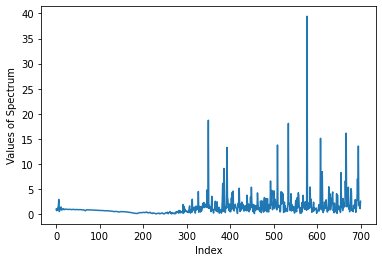

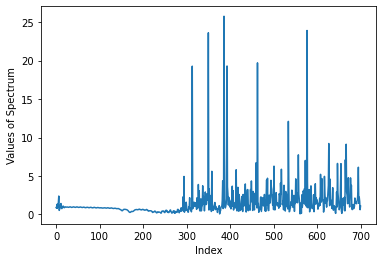

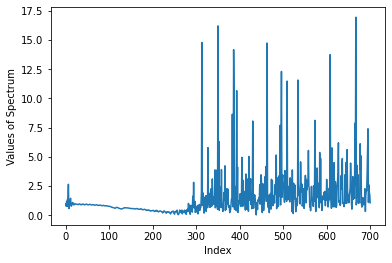

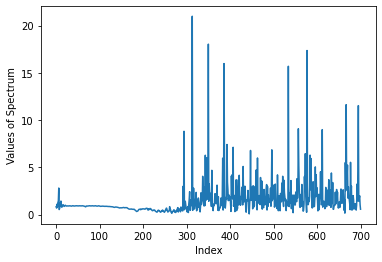

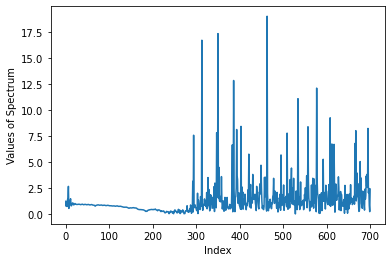

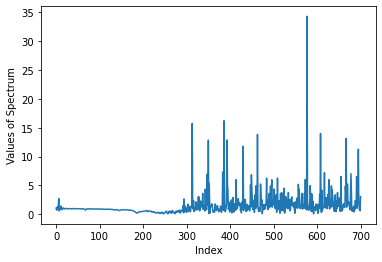

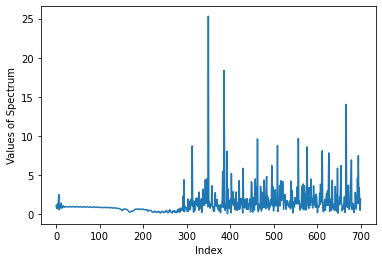

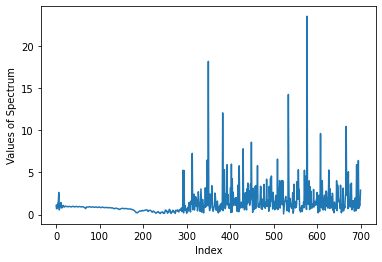

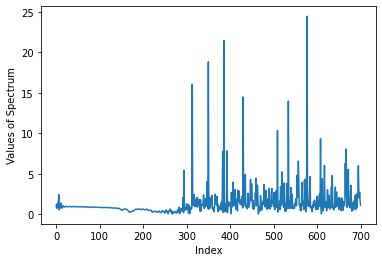

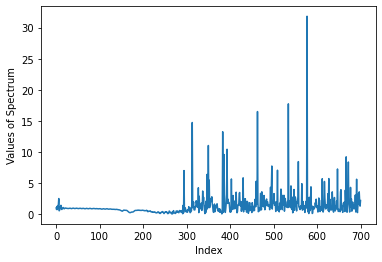

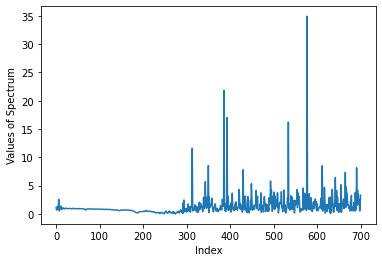

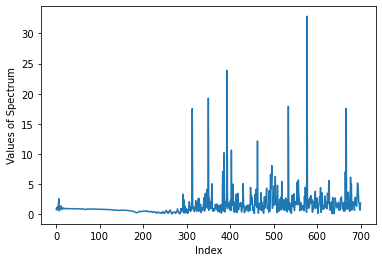

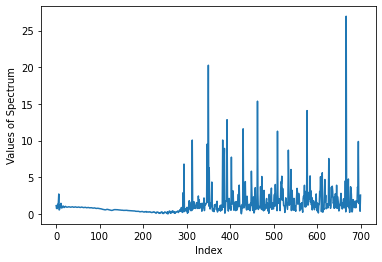

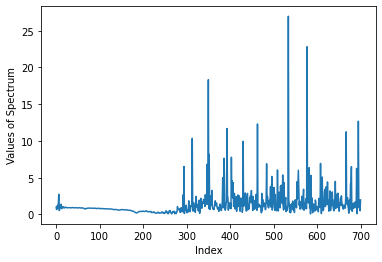

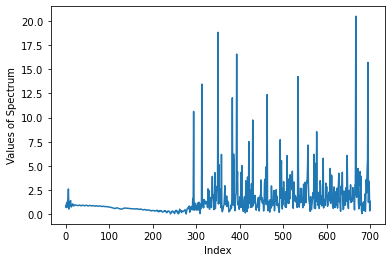

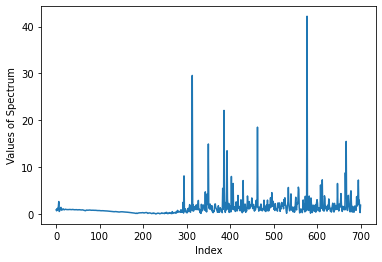

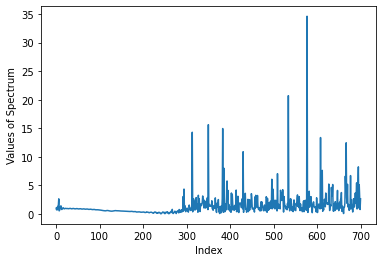

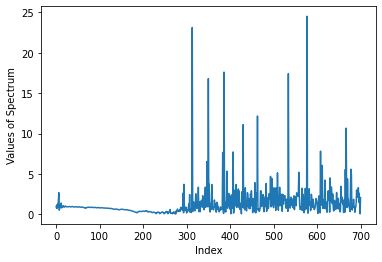

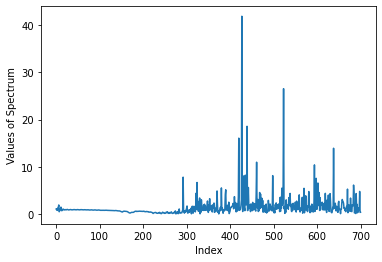

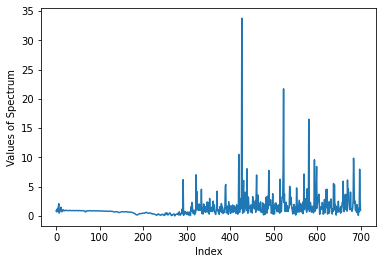

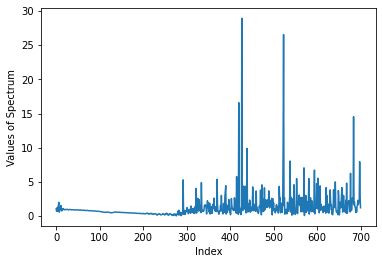

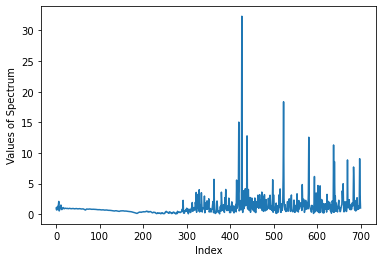

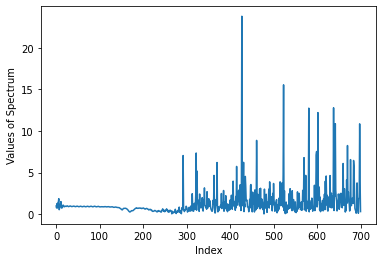

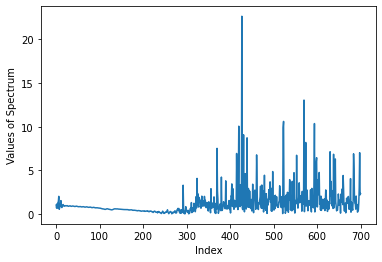

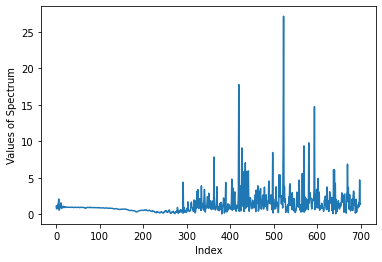

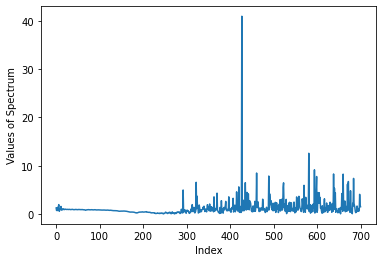

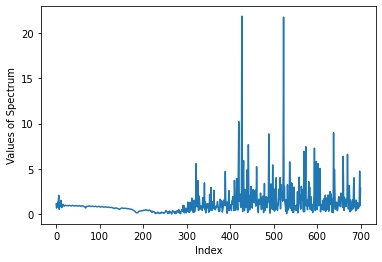

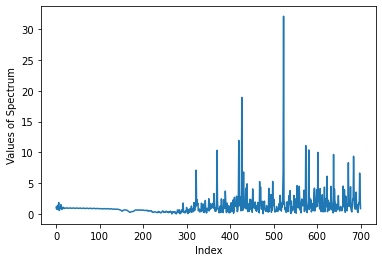

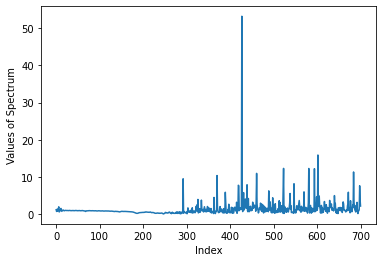

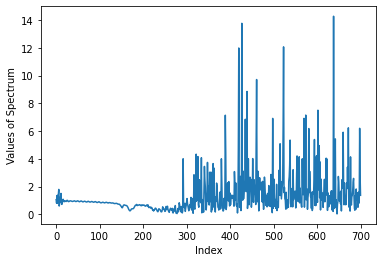

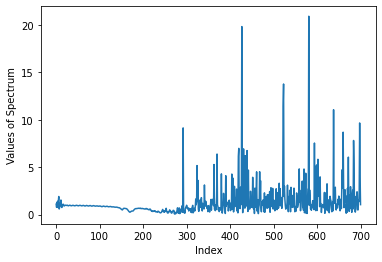

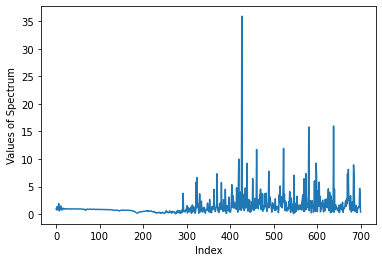

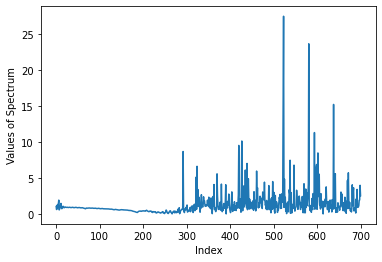

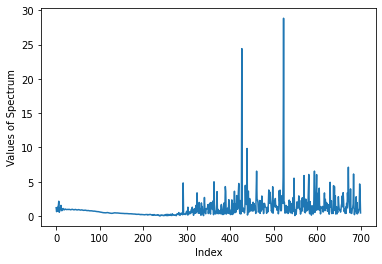

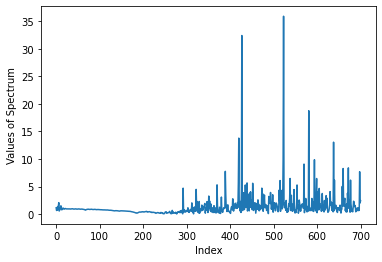

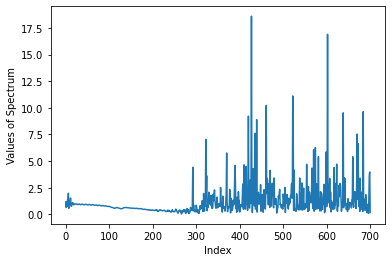

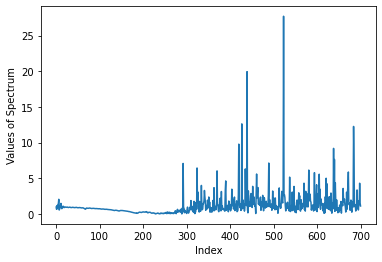

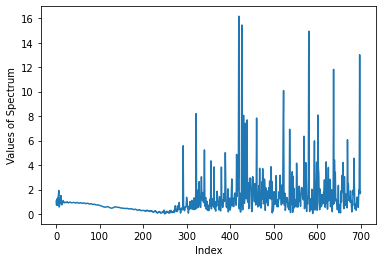

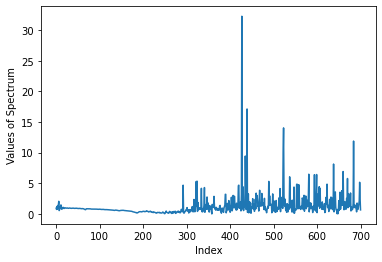

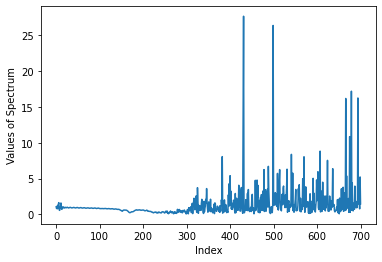

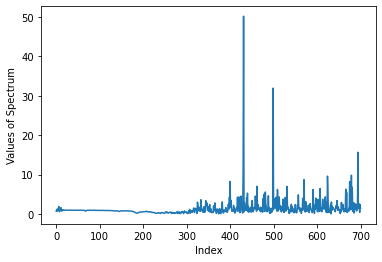

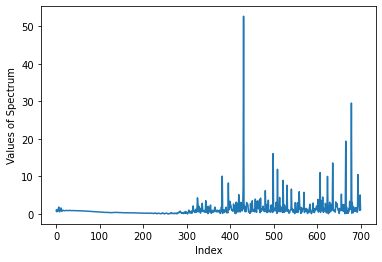

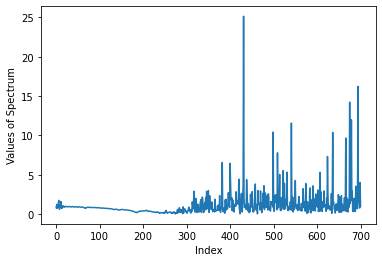

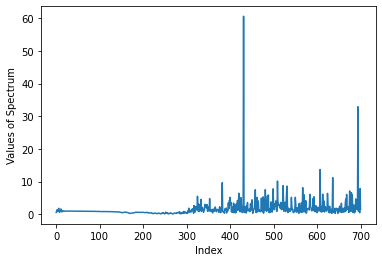

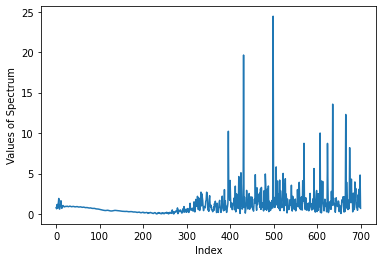

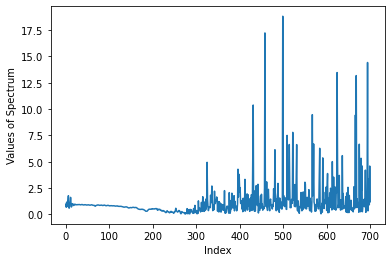

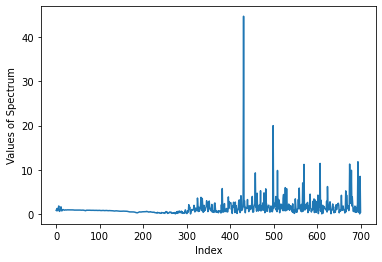

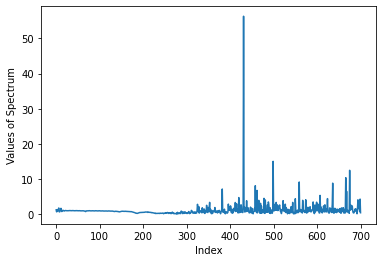

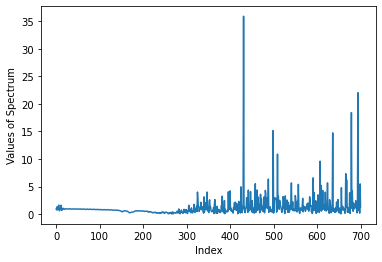

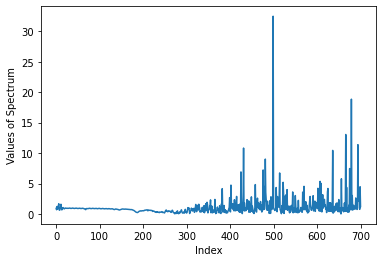

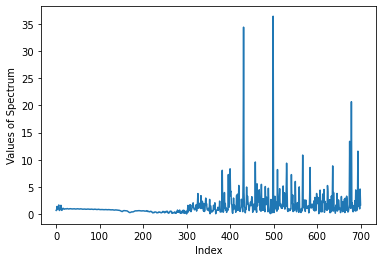

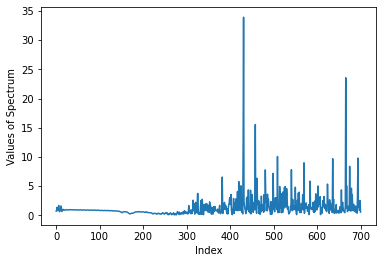

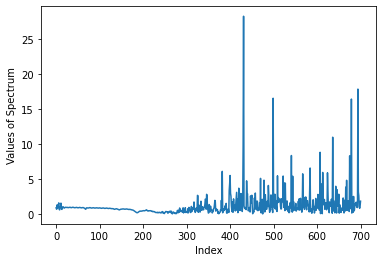

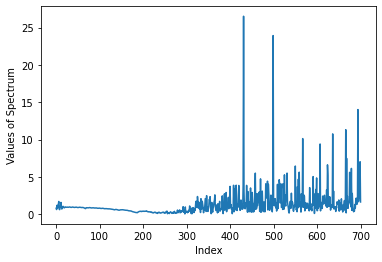

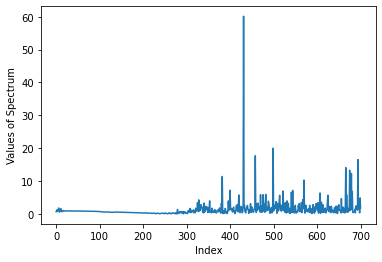

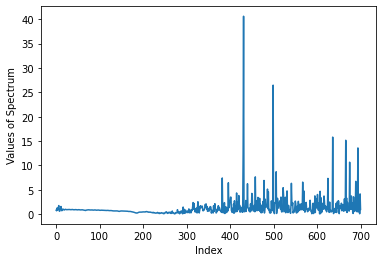

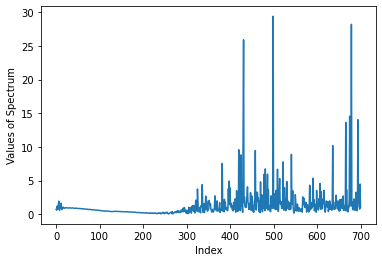

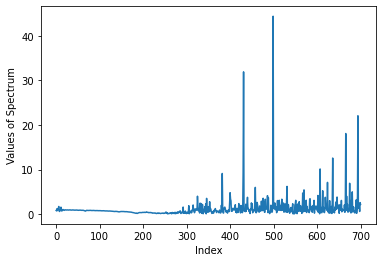

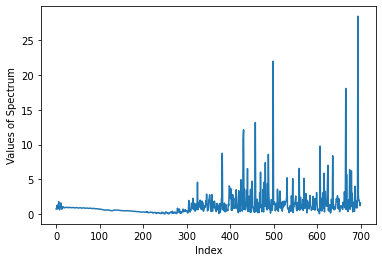

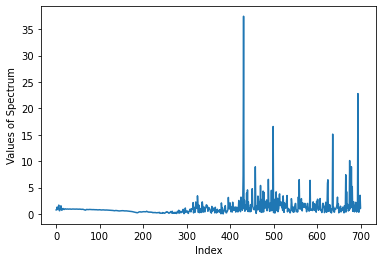

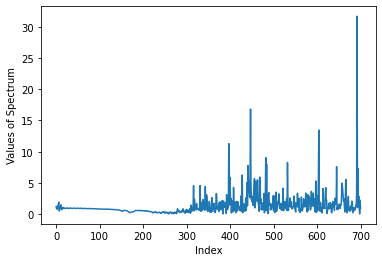

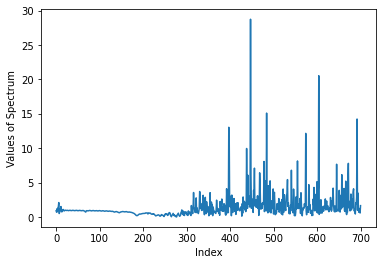

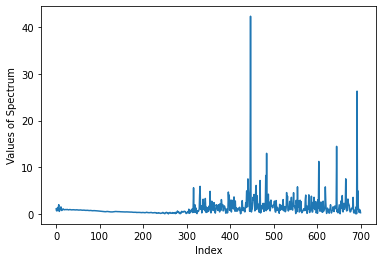

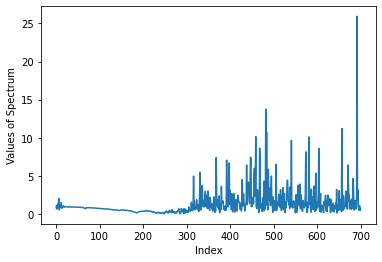

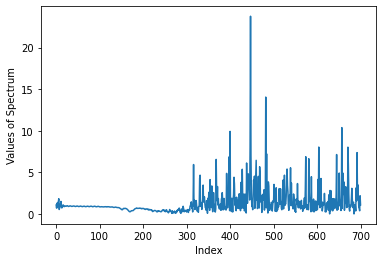

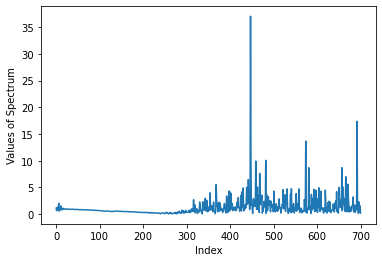

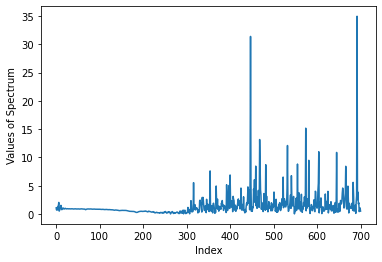

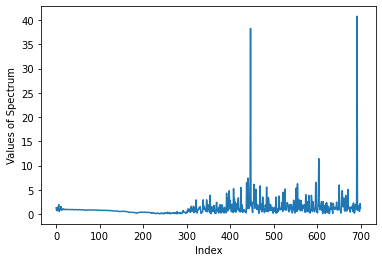

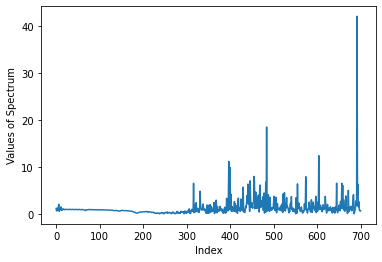

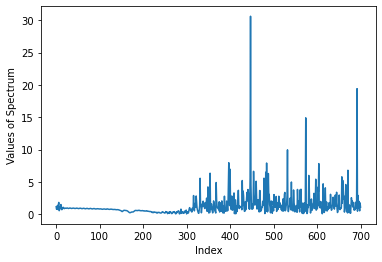

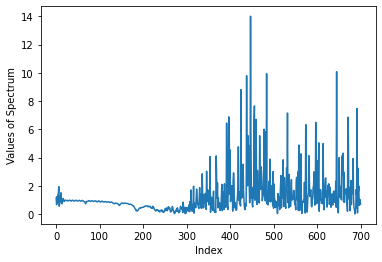

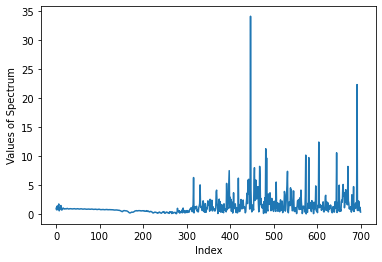

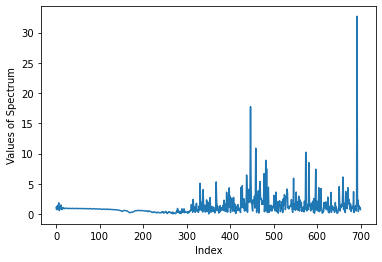

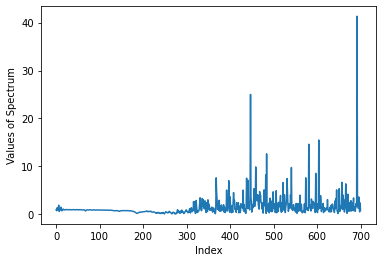

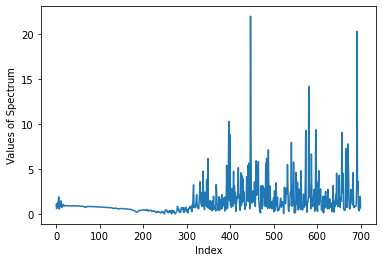

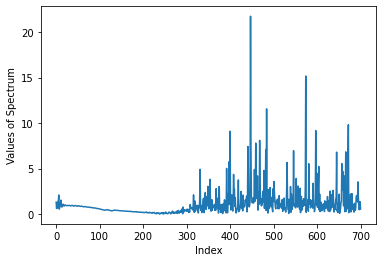

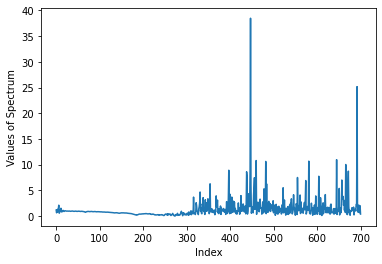

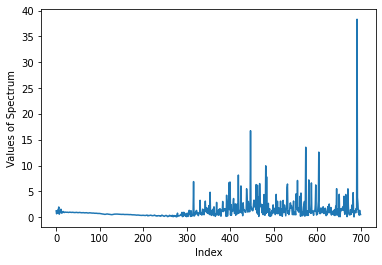

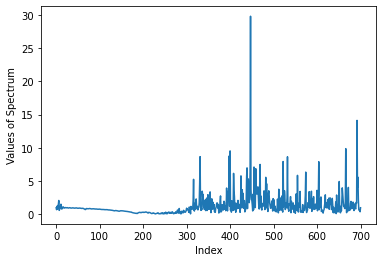

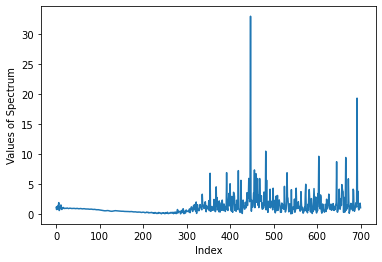

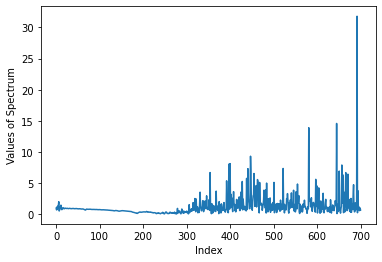

KeyError: 315

In [35]:
path = 'figure_plot/'
for i in range(0,316,1):
    plt.plot(frame_NoNaN[i])
    plt.xlabel('Index')
    plt.ylabel('Values of Spectrum')
    plt.savefig(path + f'my_plot{i}.jpg')
    plt.show()

In [4]:
arr_all = frame_NoNaN.to_numpy()

In [66]:
arr_all

array([[0.79184042, 1.12735585, 1.28925679, ..., 0.95232264, 1.0914766 ,
        1.00075748],
       [0.89658486, 0.76464407, 0.74336103, ..., 0.65906742, 0.7411692 ,
        0.71020585],
       [1.17788377, 1.18324081, 1.15980365, ..., 1.18496234, 1.2438337 ,
        1.20602162],
       ...,
       [0.06765234, 0.81509446, 0.78439842, ..., 0.53735213, 1.03853638,
        0.59666743],
       [4.5629671 , 1.99427183, 1.10887168, ..., 0.3464698 , 1.80835309,
        1.02443432],
       [1.36408797, 1.78527147, 1.0091247 , ..., 0.95122673, 1.04296796,
        0.69720513]])

In [67]:
arr_all.shape

(701, 315)

In [71]:
y1 = []
for i in np.arange(0,44163,1):
    y1.append(0.)
    y1.append(1.)
    y1.append(2.)
    y1.append(3.)
    y1.append(4.)

In [54]:
y1

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 0.0,
 1.0

In [72]:
y_arr=np.array(y1)
y_arr.shape

(220815,)

In [73]:
y_arrall=y_arr.reshape(701,315)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(arr_all,y_arrall, test_size = 0.2, random_state = 42)

In [75]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(560, 315) (141, 315) (560, 315) (141, 315)


In [76]:
model_KN = KNeighborsClassifier()
model_Tree = DecisionTreeClassifier()
model_Random = RandomForestClassifier()

In [115]:
from sklearn.metrics import accuracy_score
from sklearn.multioutput import MultiOutputClassifier
model_KN = KNeighborsClassifier()
model_Tree = DecisionTreeClassifier()
model_Random = RandomForestClassifier()
classifier_KN = MultiOutputClassifier(model_KN, n_jobs=-1)
classifier_Tree = MultiOutputClassifier(model_Tree, n_jobs=-1)
classifier_Random = MultiOutputClassifier(model_Random, n_jobs=-1)
classifier_KN.fit(X_train,y_train)
classifier_Tree.fit(X_train,y_train)
classifier_Random.fit(X_train,y_train)
y_pred_KN = classifier_KN.predict(X_test)
y_pred_Tree = classifier_Tree.predict(X_test)
y_pred_Random =classifier_Random.predict(X_test)

In [116]:
re_test = y_test.flatten()

In [118]:
re_Tree = y_pred_Tree.flatten()
re_KN = y_pred_KN.flatten()
re_Random = y_pred_Random.flatten()

In [121]:
accuracyTree = accuracy_score(re_test,re_Tree)
accuracyKN = accuracy_score(re_test,re_KN)
print('accuracy_DecisionTreeClassifier :',"{:.2%}".format(accuracyTree))
print('accuracy_KNeighborsClassifier :',"{:.2%}".format(accuracyKN))

accuracy_DecisionTreeClassifier : 100.00%
accuracy_KNeighborsClassifier : 100.00%
